# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,auc,confusion_matrix,classification_report,roc_auc_score,roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

#### Reading Dataset

In [2]:
raw_data = pd.read_csv('bank-full.csv',delimiter=';')
raw_data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


### Checking Datatypes of Columns & Performing Descriptive Statistics

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
raw_data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


### No.of.Records and Features

In [5]:
raw_data.shape

(45211, 17)

### Renaming the Columns

In [6]:
raw_data.columns         

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [7]:
raw_data=raw_data.rename({'default':'def_credit','contact':'contact_type','campaign':'no_of_times_contacted'},axis=1)
raw_data.head()

,age,job,marital,education,def_credit,balance,housing,loan,contact_type,day,month,duration,no_of_times_contacted,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Checking for NULL and DUPLICATED values

In [8]:
raw_data.isnull().sum()

age                      0
job                      0
marital                  0
education                0
def_credit               0
balance                  0
housing                  0
loan                     0
contact_type             0
day                      0
month                    0
duration                 0
no_of_times_contacted    0
pdays                    0
previous                 0
poutcome                 0
y                        0
dtype: int64

In [9]:
raw_data[raw_data.duplicated()]

,age,job,marital,education,def_credit,balance,housing,loan,contact_type,day,month,duration,no_of_times_contacted,pdays,previous,poutcome,y


### Finding number of Numerical and Categorical Features

In [10]:
numerical_features = [feature for feature in raw_data.columns if raw_data[feature].dtype !='O']
print('There are {} numerical feature in our data' .format(len(numerical_features)))

There are 7 numerical feature in our data


In [11]:
raw_data[numerical_features].head()

,age,balance,day,duration,no_of_times_contacted,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


In [12]:
cat_features = [feature for feature in raw_data.columns if raw_data[feature].dtype == 'O']
print('There are {} categorical feature in our data' .format(len(cat_features)))

There are 10 categorical feature in our data


In [13]:
raw_data[cat_features].head()

,job,marital,education,def_credit,housing,loan,contact_type,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


### Checking for Correlation between Numerical Predictor variables

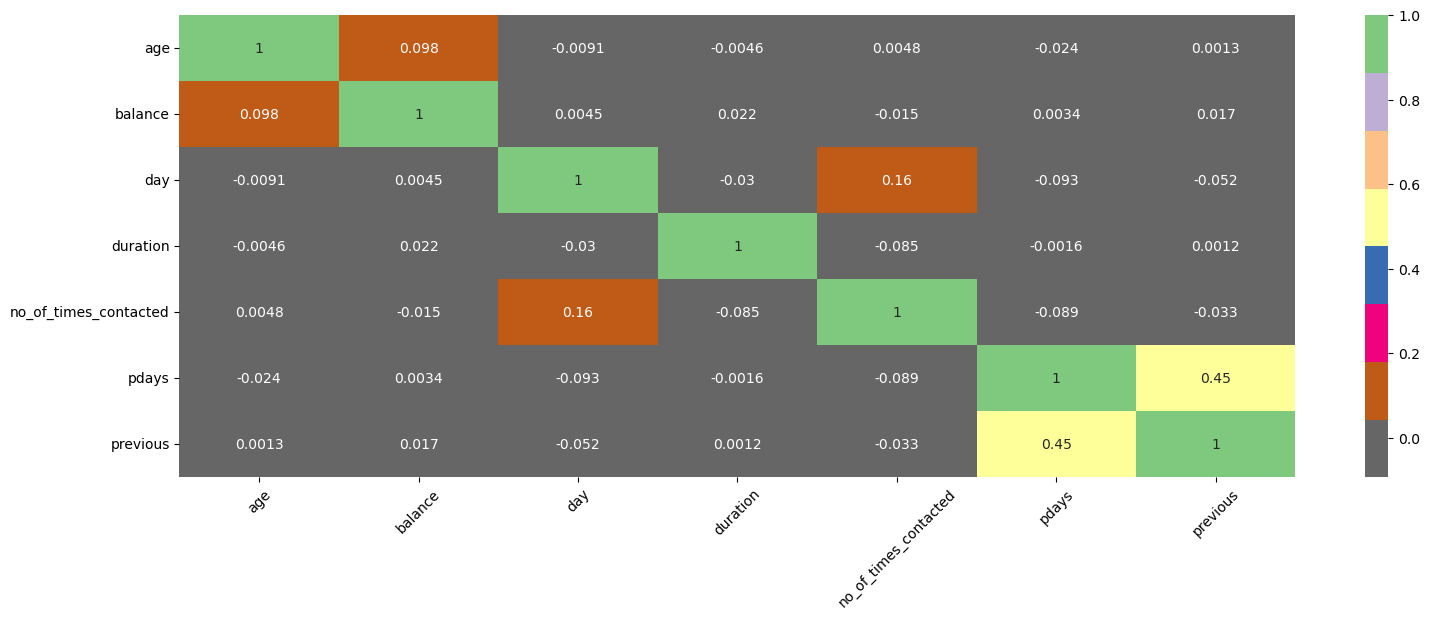

In [14]:
fig= plt.figure(figsize=(18, 6))
sns.heatmap(raw_data.corr(), annot=True, cmap='Accent_r');
plt.xticks(rotation=45)
plt.show()

### Checking for outliers in the Numerical features

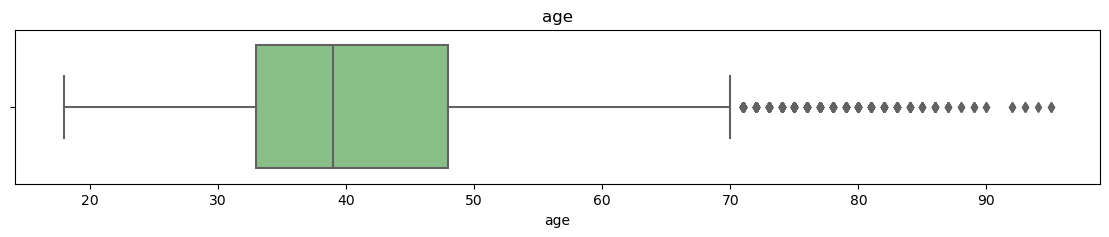

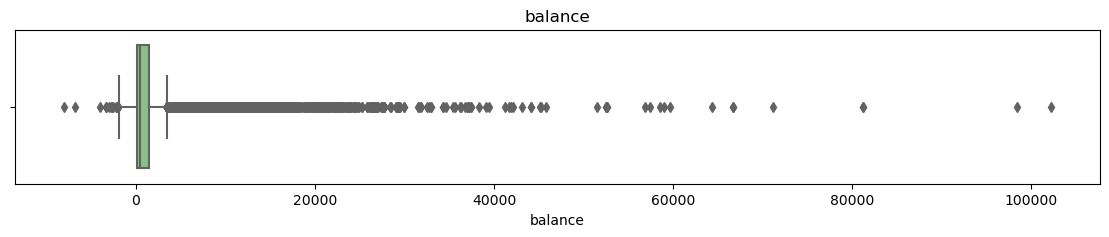

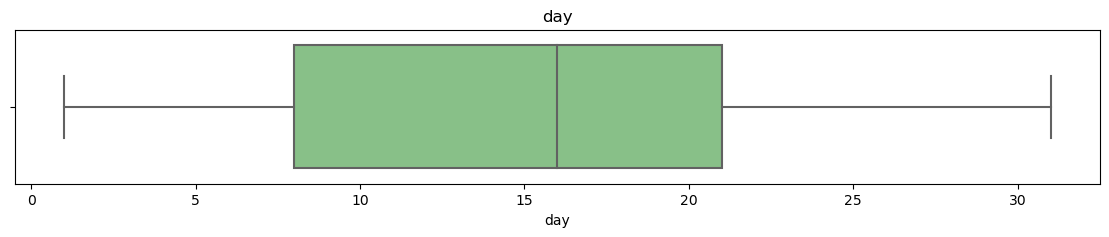

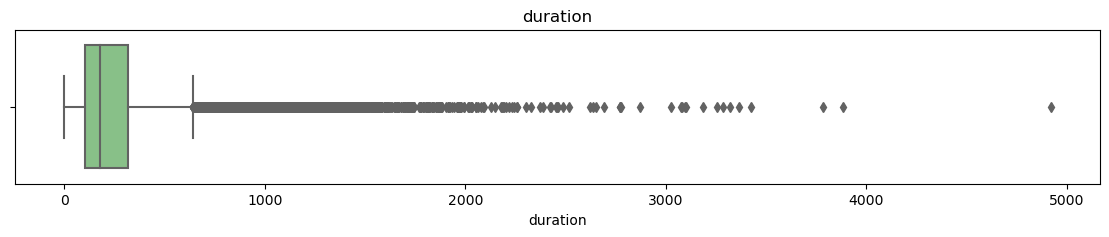

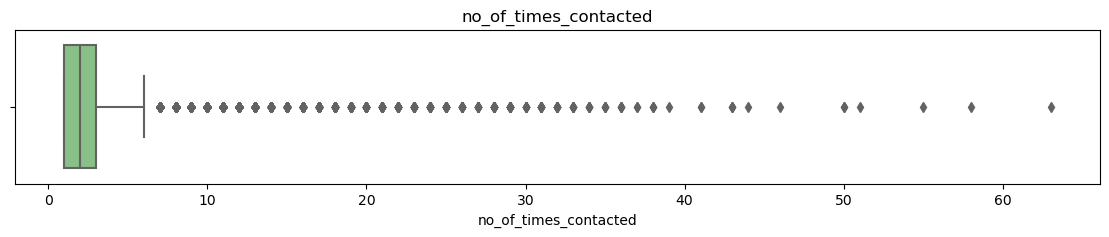

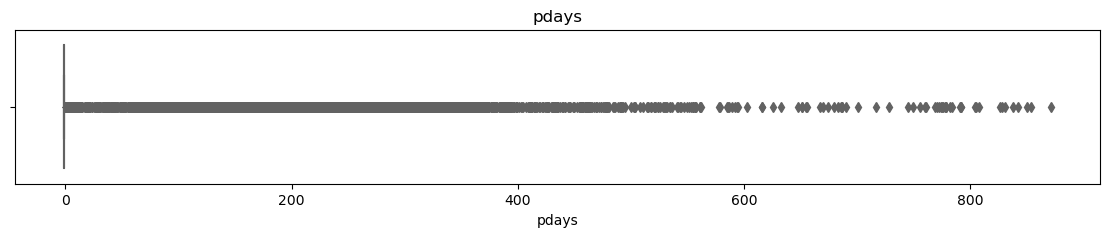

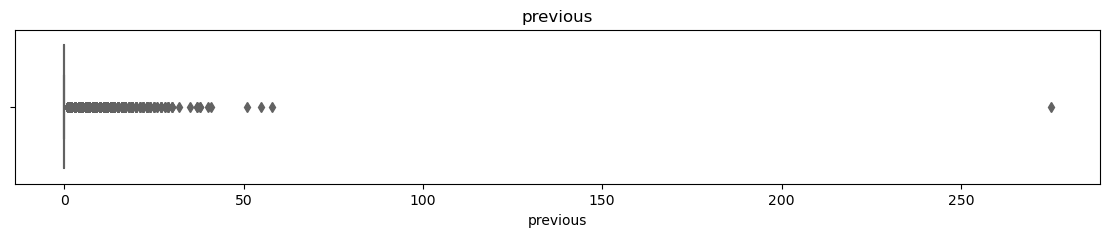

In [15]:
bp = raw_data.copy()
for feature in numerical_features:
    plt.subplots(figsize=(14,2))
    sns.boxplot(x=feature, data=bp, palette='Accent')
    plt.title(feature)
    plt.show()


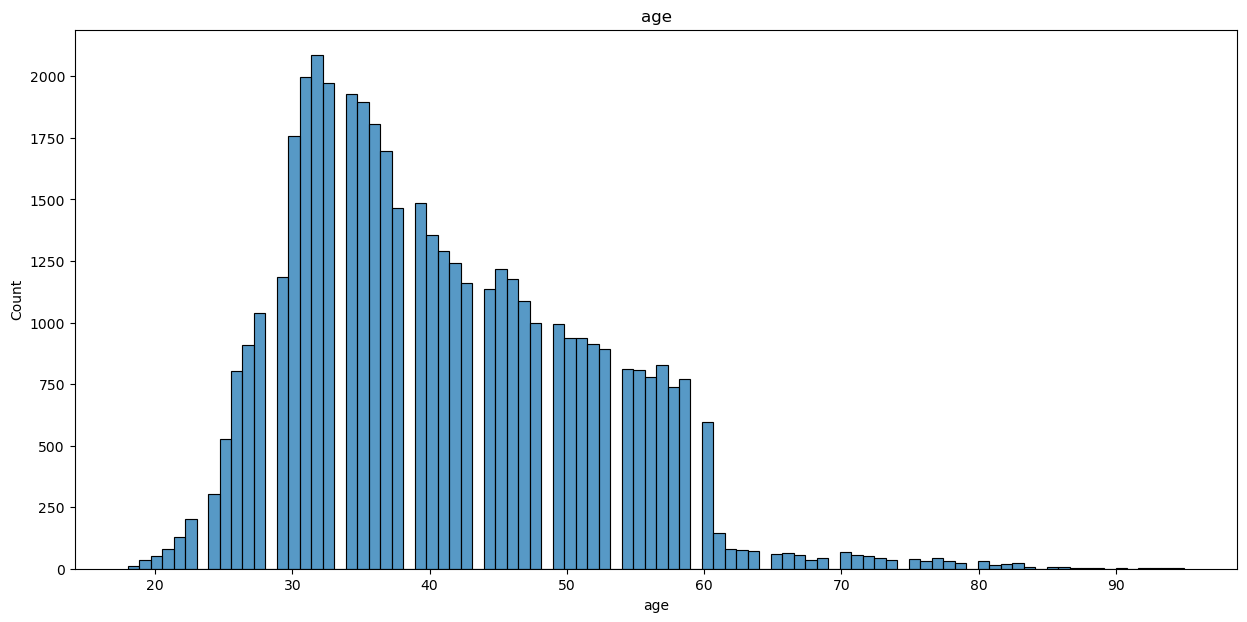

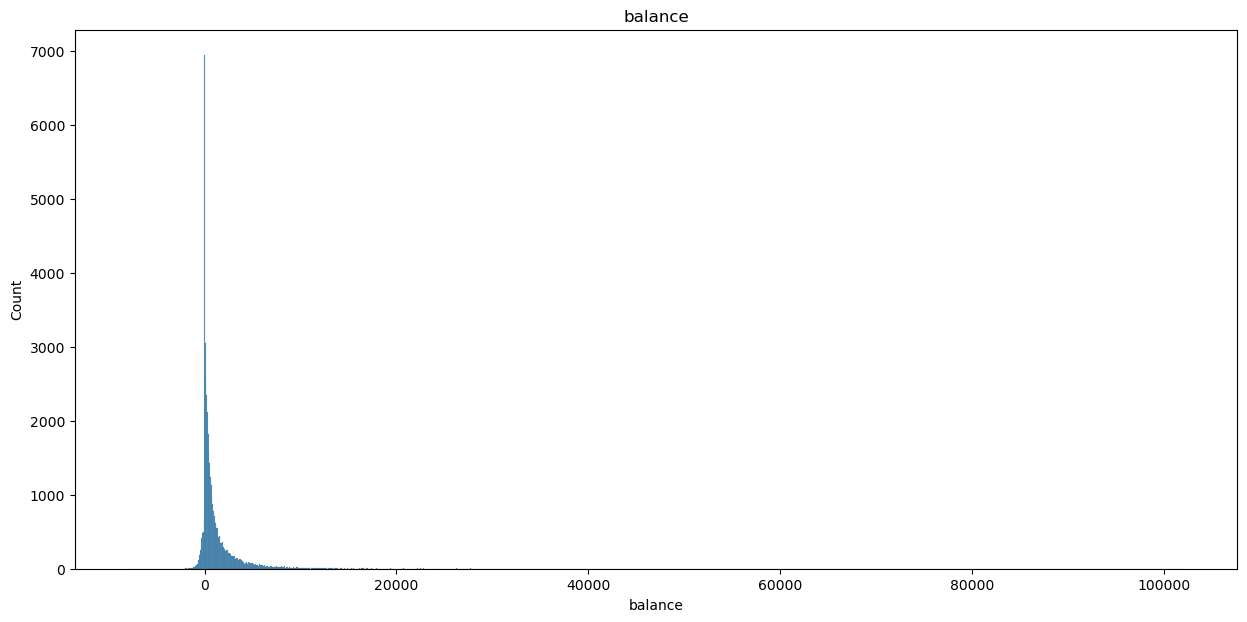

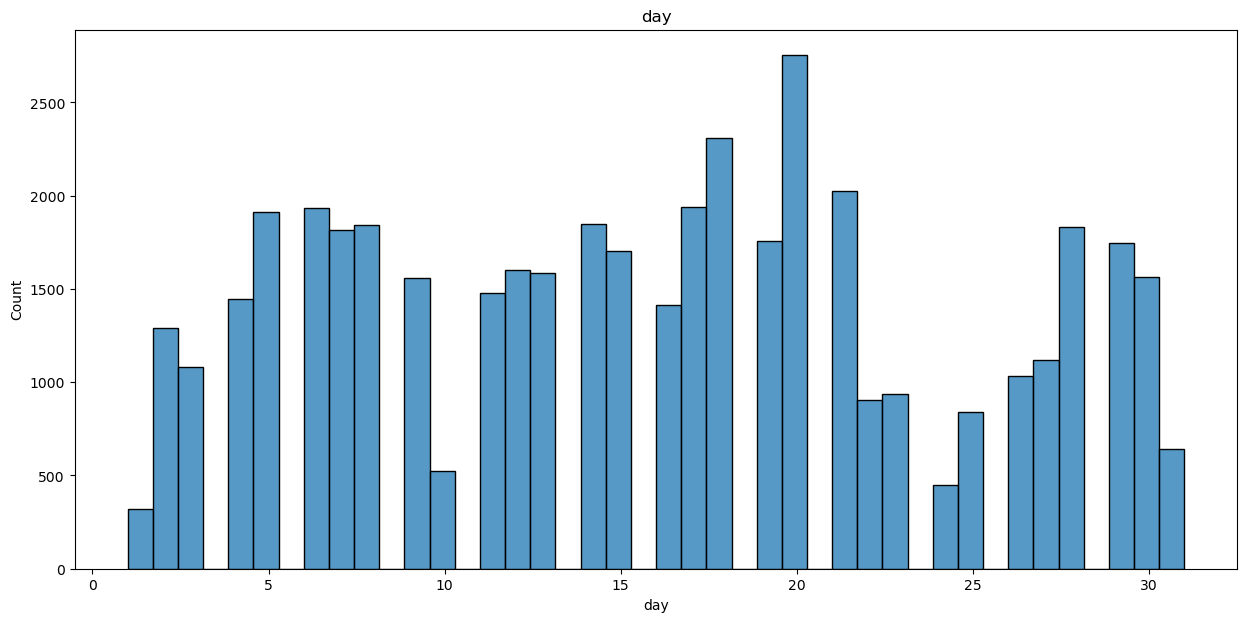

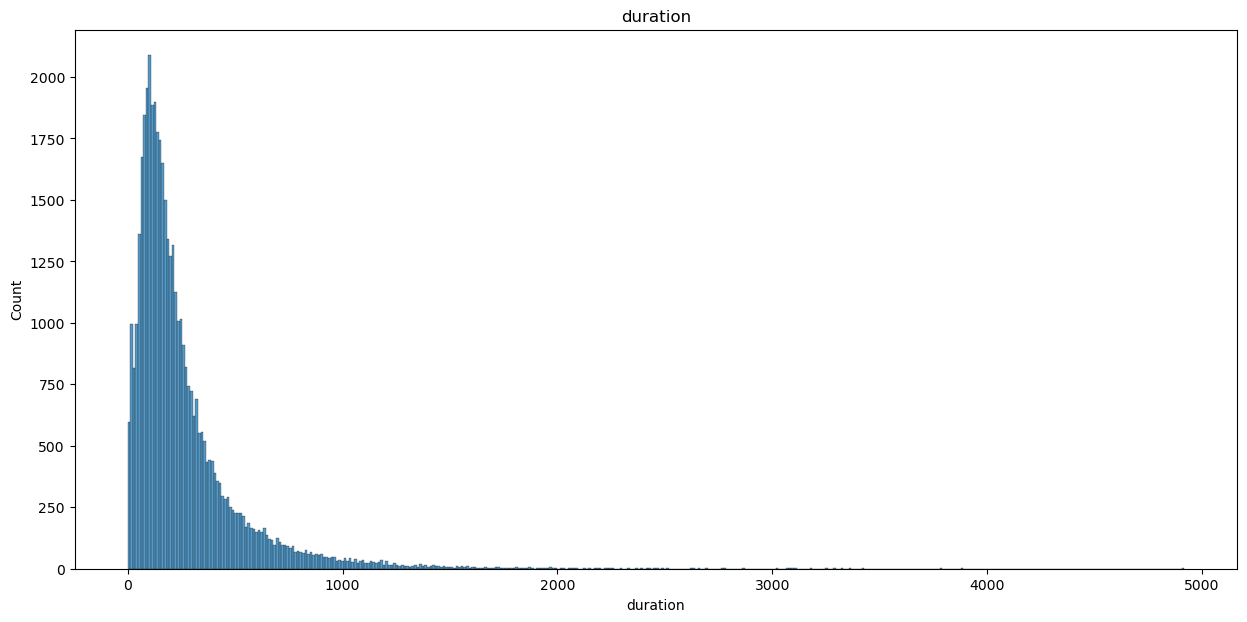

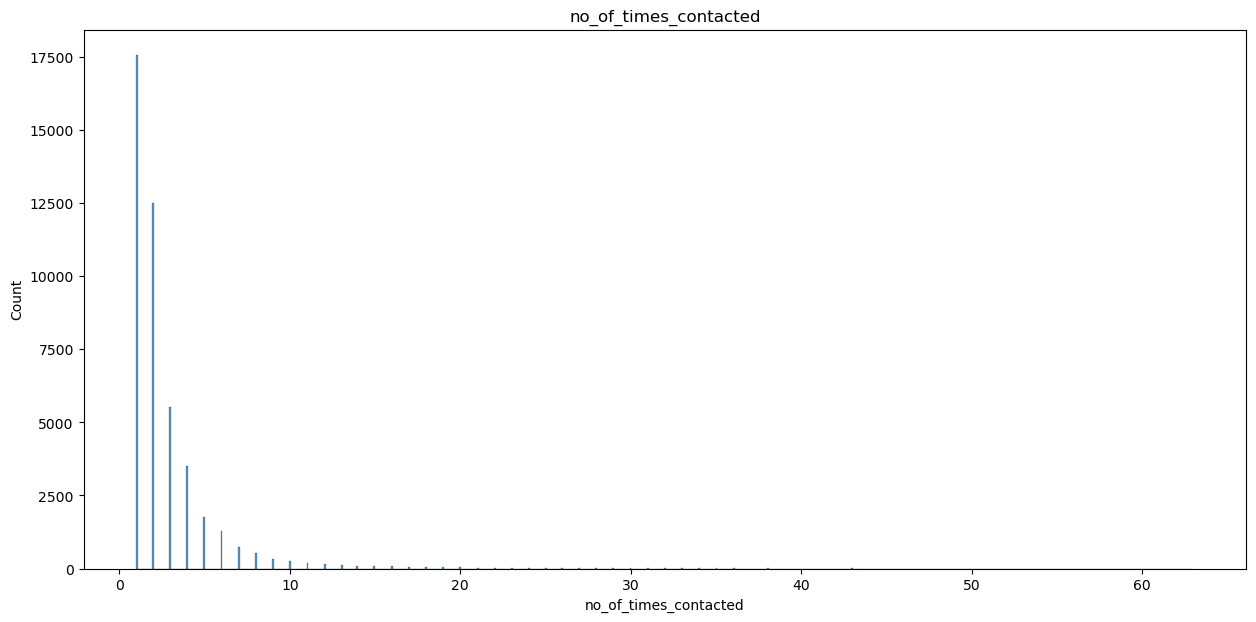

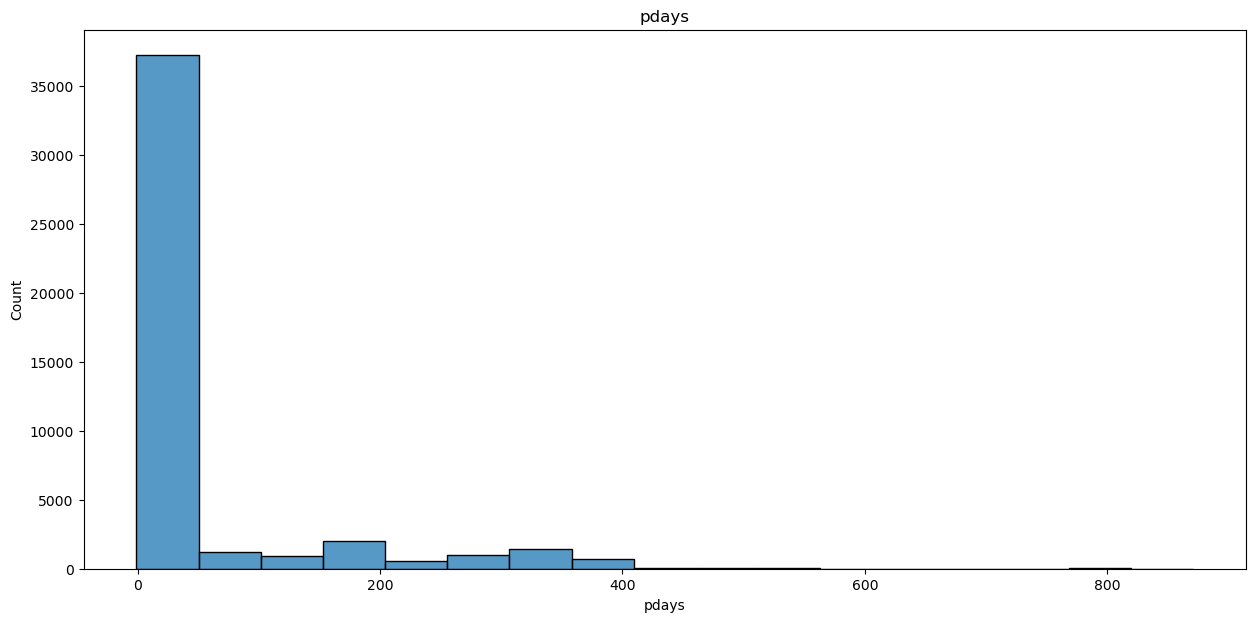

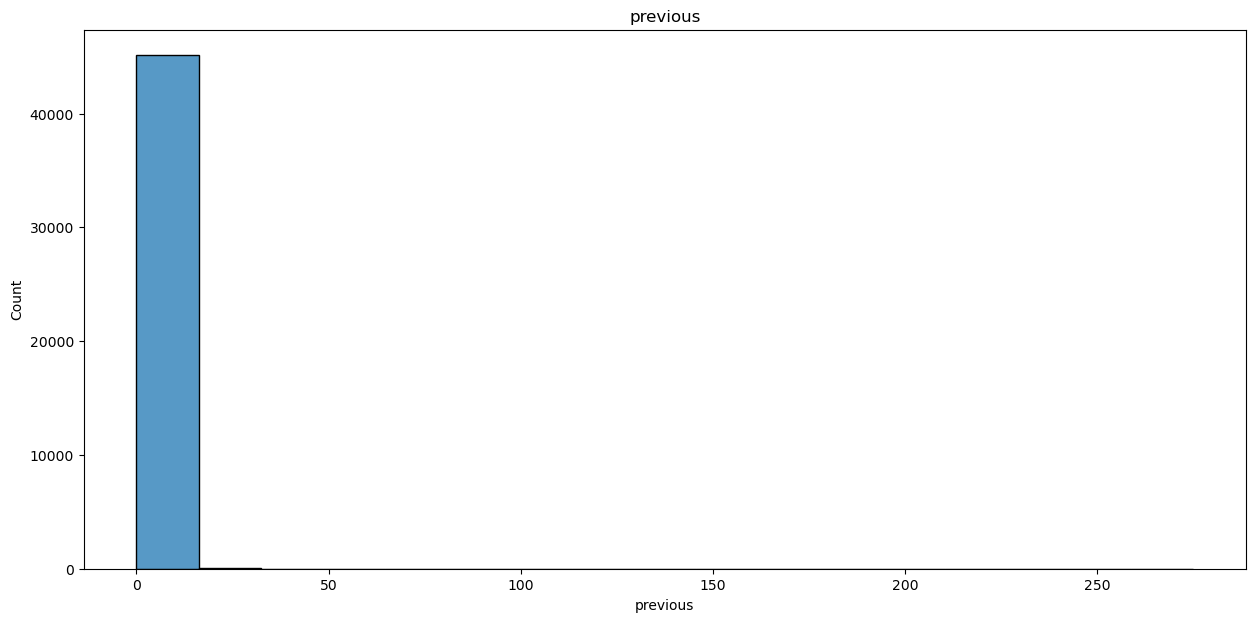

In [16]:
hp = raw_data.copy()
for feature in numerical_features:
            plt.subplots(figsize=(15,7))
            sns.histplot(x=feature, data=hp, palette='Accent')
            plt.title(feature)
            plt.show()

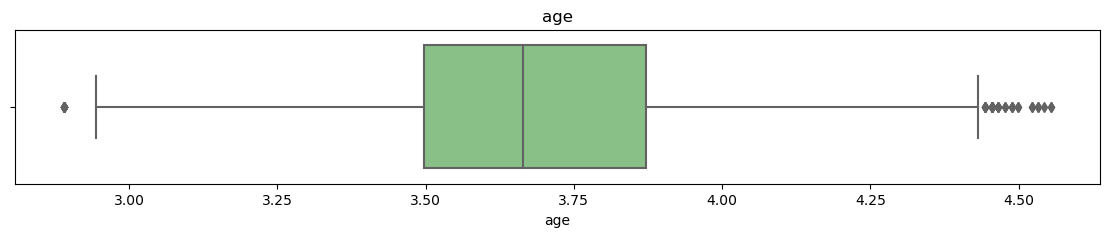

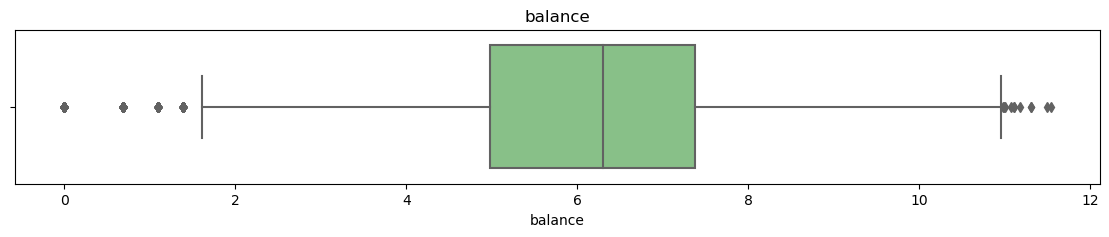

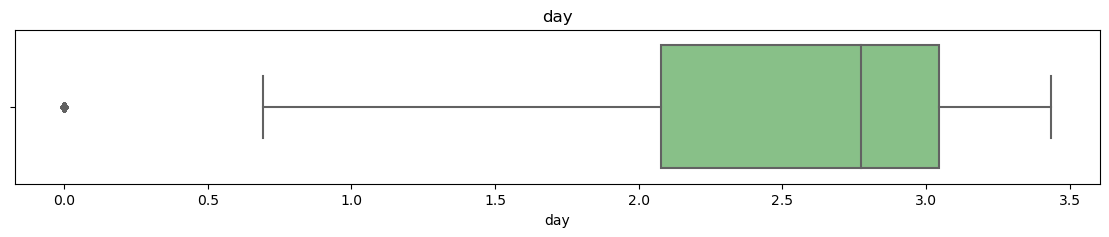

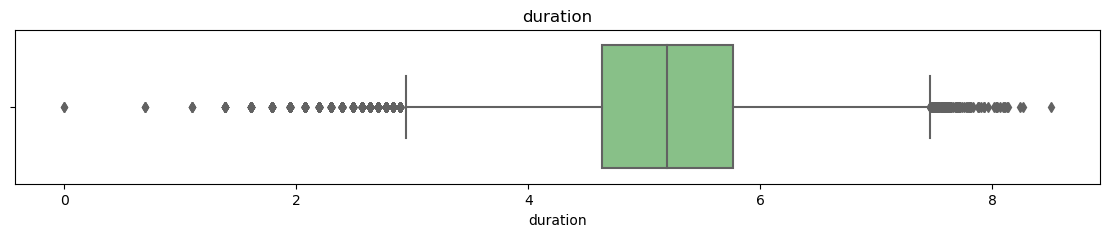

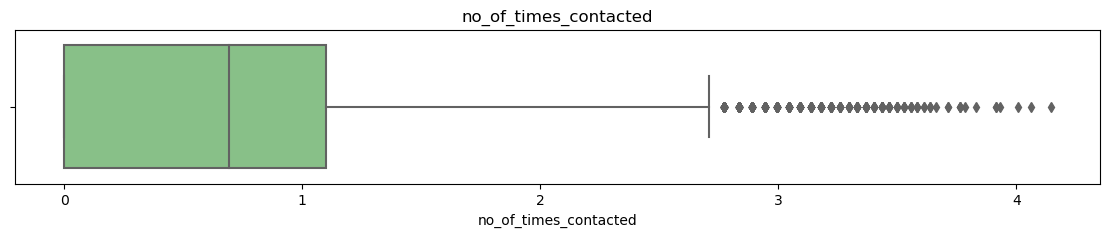

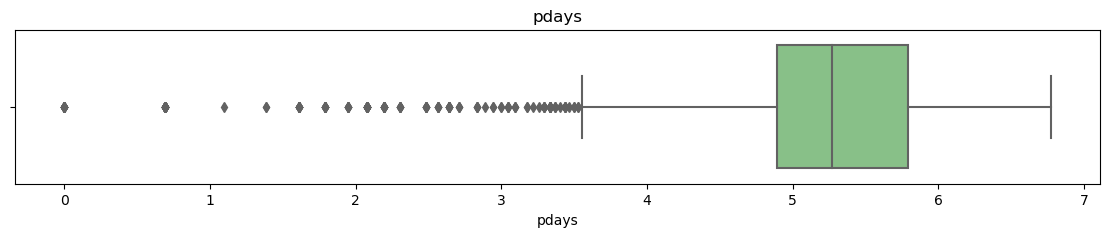

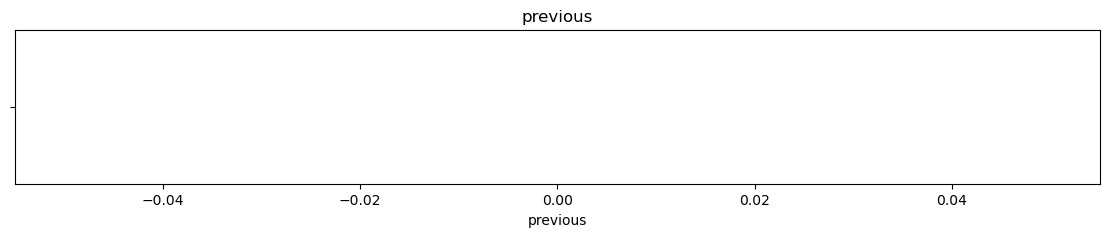

In [17]:
log_bp = raw_data.copy()
for feature in numerical_features:
    plt.subplots(figsize=(14,2))
    log_bp[feature] = np.log(log_bp[feature])
    sns.boxplot(x=feature, data=log_bp, palette='Accent')
    plt.title(feature)
    plt.show()

### Using Log transformation to deal with Outliers

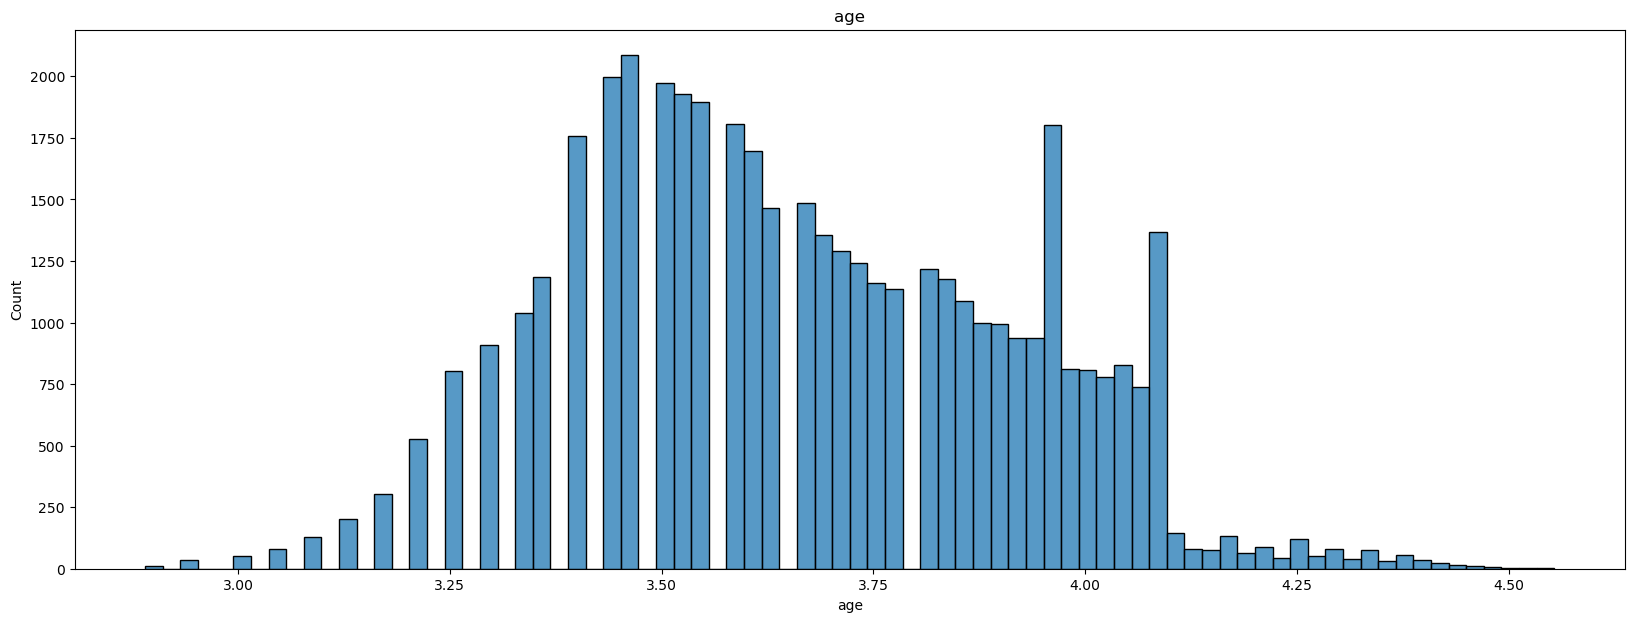

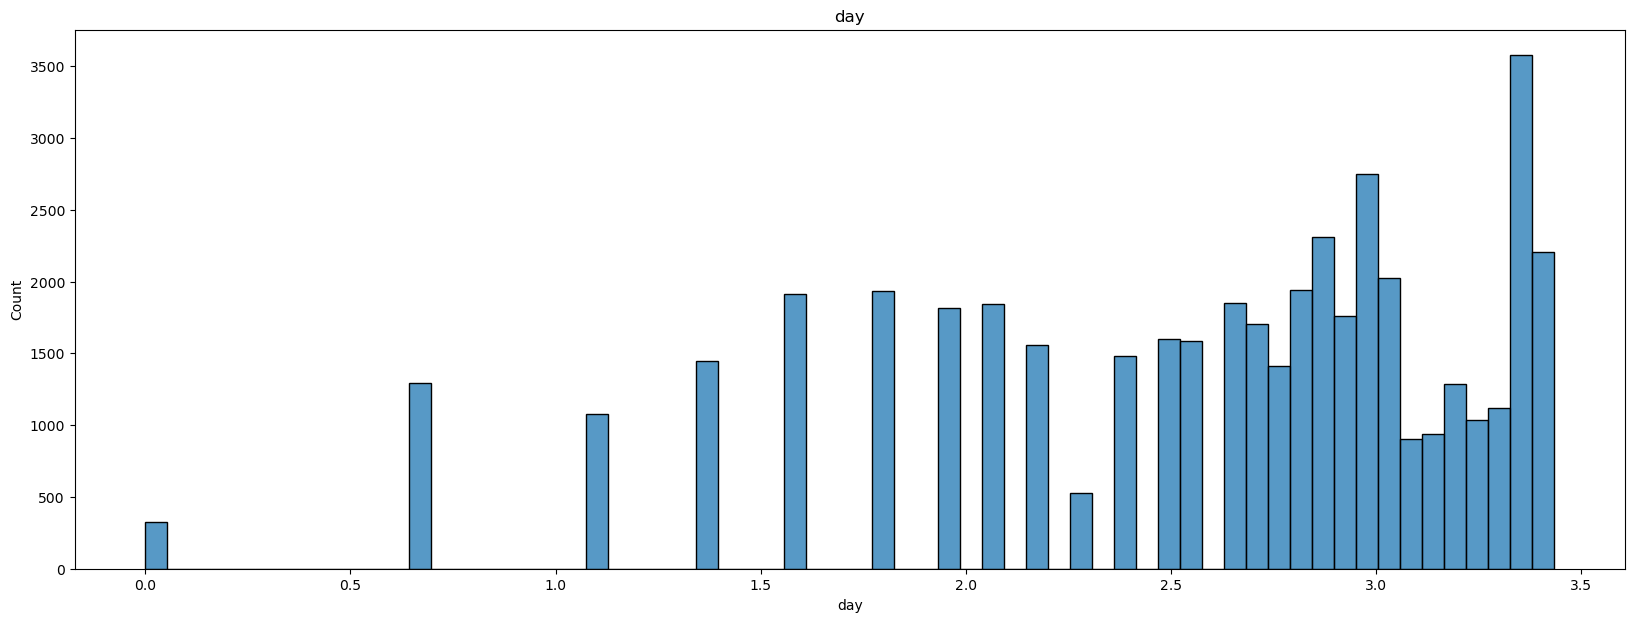

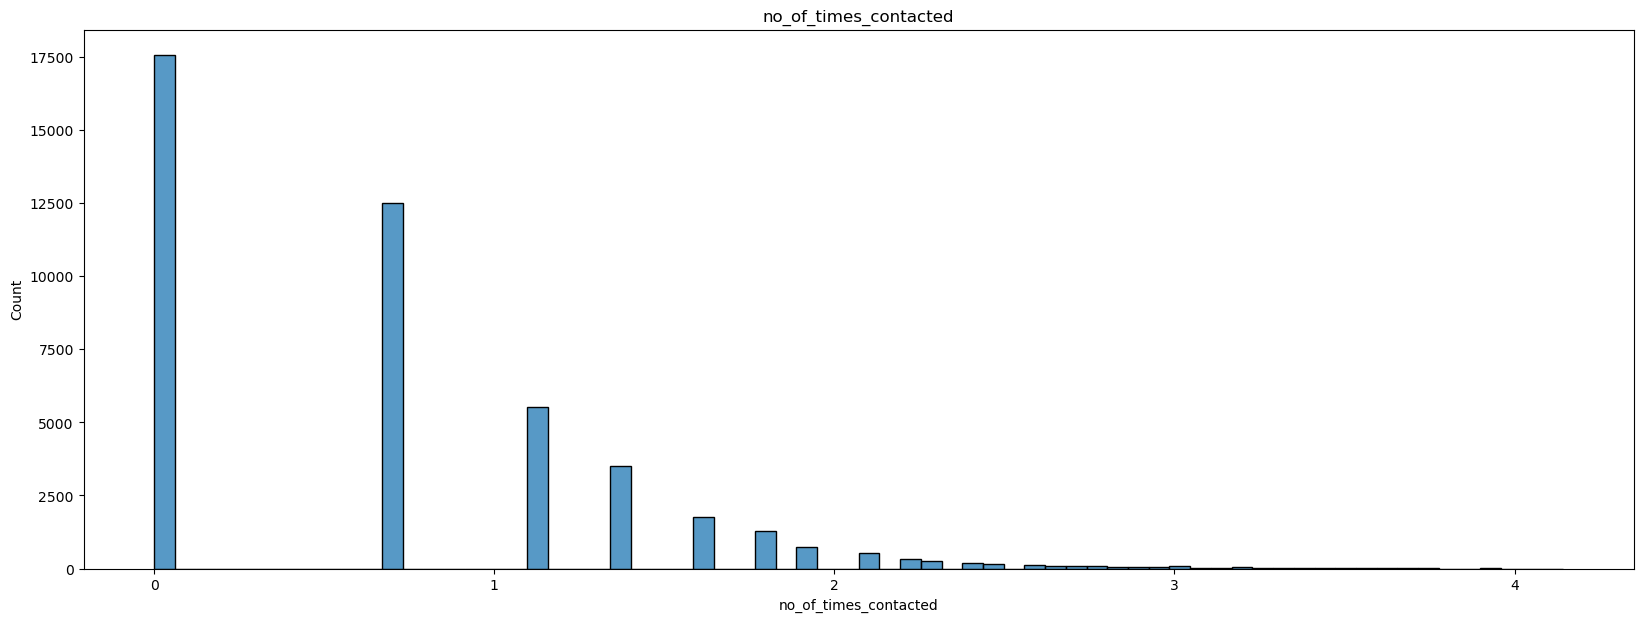

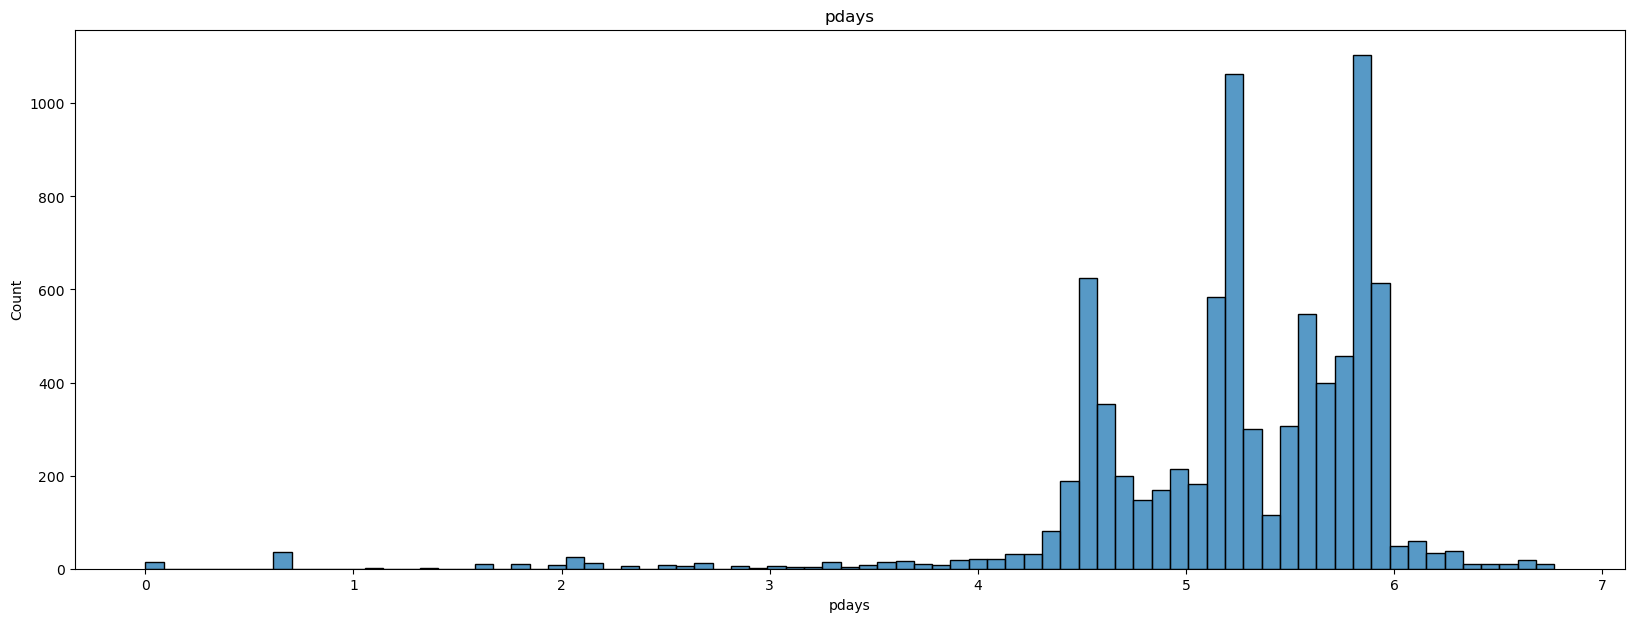

In [18]:
log_hp = raw_data.copy()
for feature in numerical_features:
        if 0 in log_hp[feature].unique():
            pass
        else:
            plt.subplots(figsize=(20,7))
            log_hp[feature]=np.log(log_hp[feature])
            sns.histplot(x=feature, data=log_hp, palette='Accent')
            plt.title(feature)
            plt.show()

In [19]:
raw_data.head()

,age,job,marital,education,def_credit,balance,housing,loan,contact_type,day,month,duration,no_of_times_contacted,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Unique values in Categorical features and it's Visualization

In [20]:
for feature in cat_features:
    print('There are {} unique values in {} feature' .format(len(raw_data[feature].unique()),feature))
    print(raw_data[feature].value_counts())
    print()
    print()
    


There are 12 unique values in job feature
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64


There are 3 unique values in marital feature
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64


There are 4 unique values in education feature
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64


There are 2 unique values in def_credit feature
no     44396
yes      815
Name: def_credit, dtype: int64


There are 2 unique values in housing feature
yes    25130
no     20081
Name: housing, dtype: int64


There are 2 unique values in loan feature
no     37967
yes     7244
Name: loan, dtype: int64


There are 3 unique values in contact_type feature
cellular     29285
unknown     

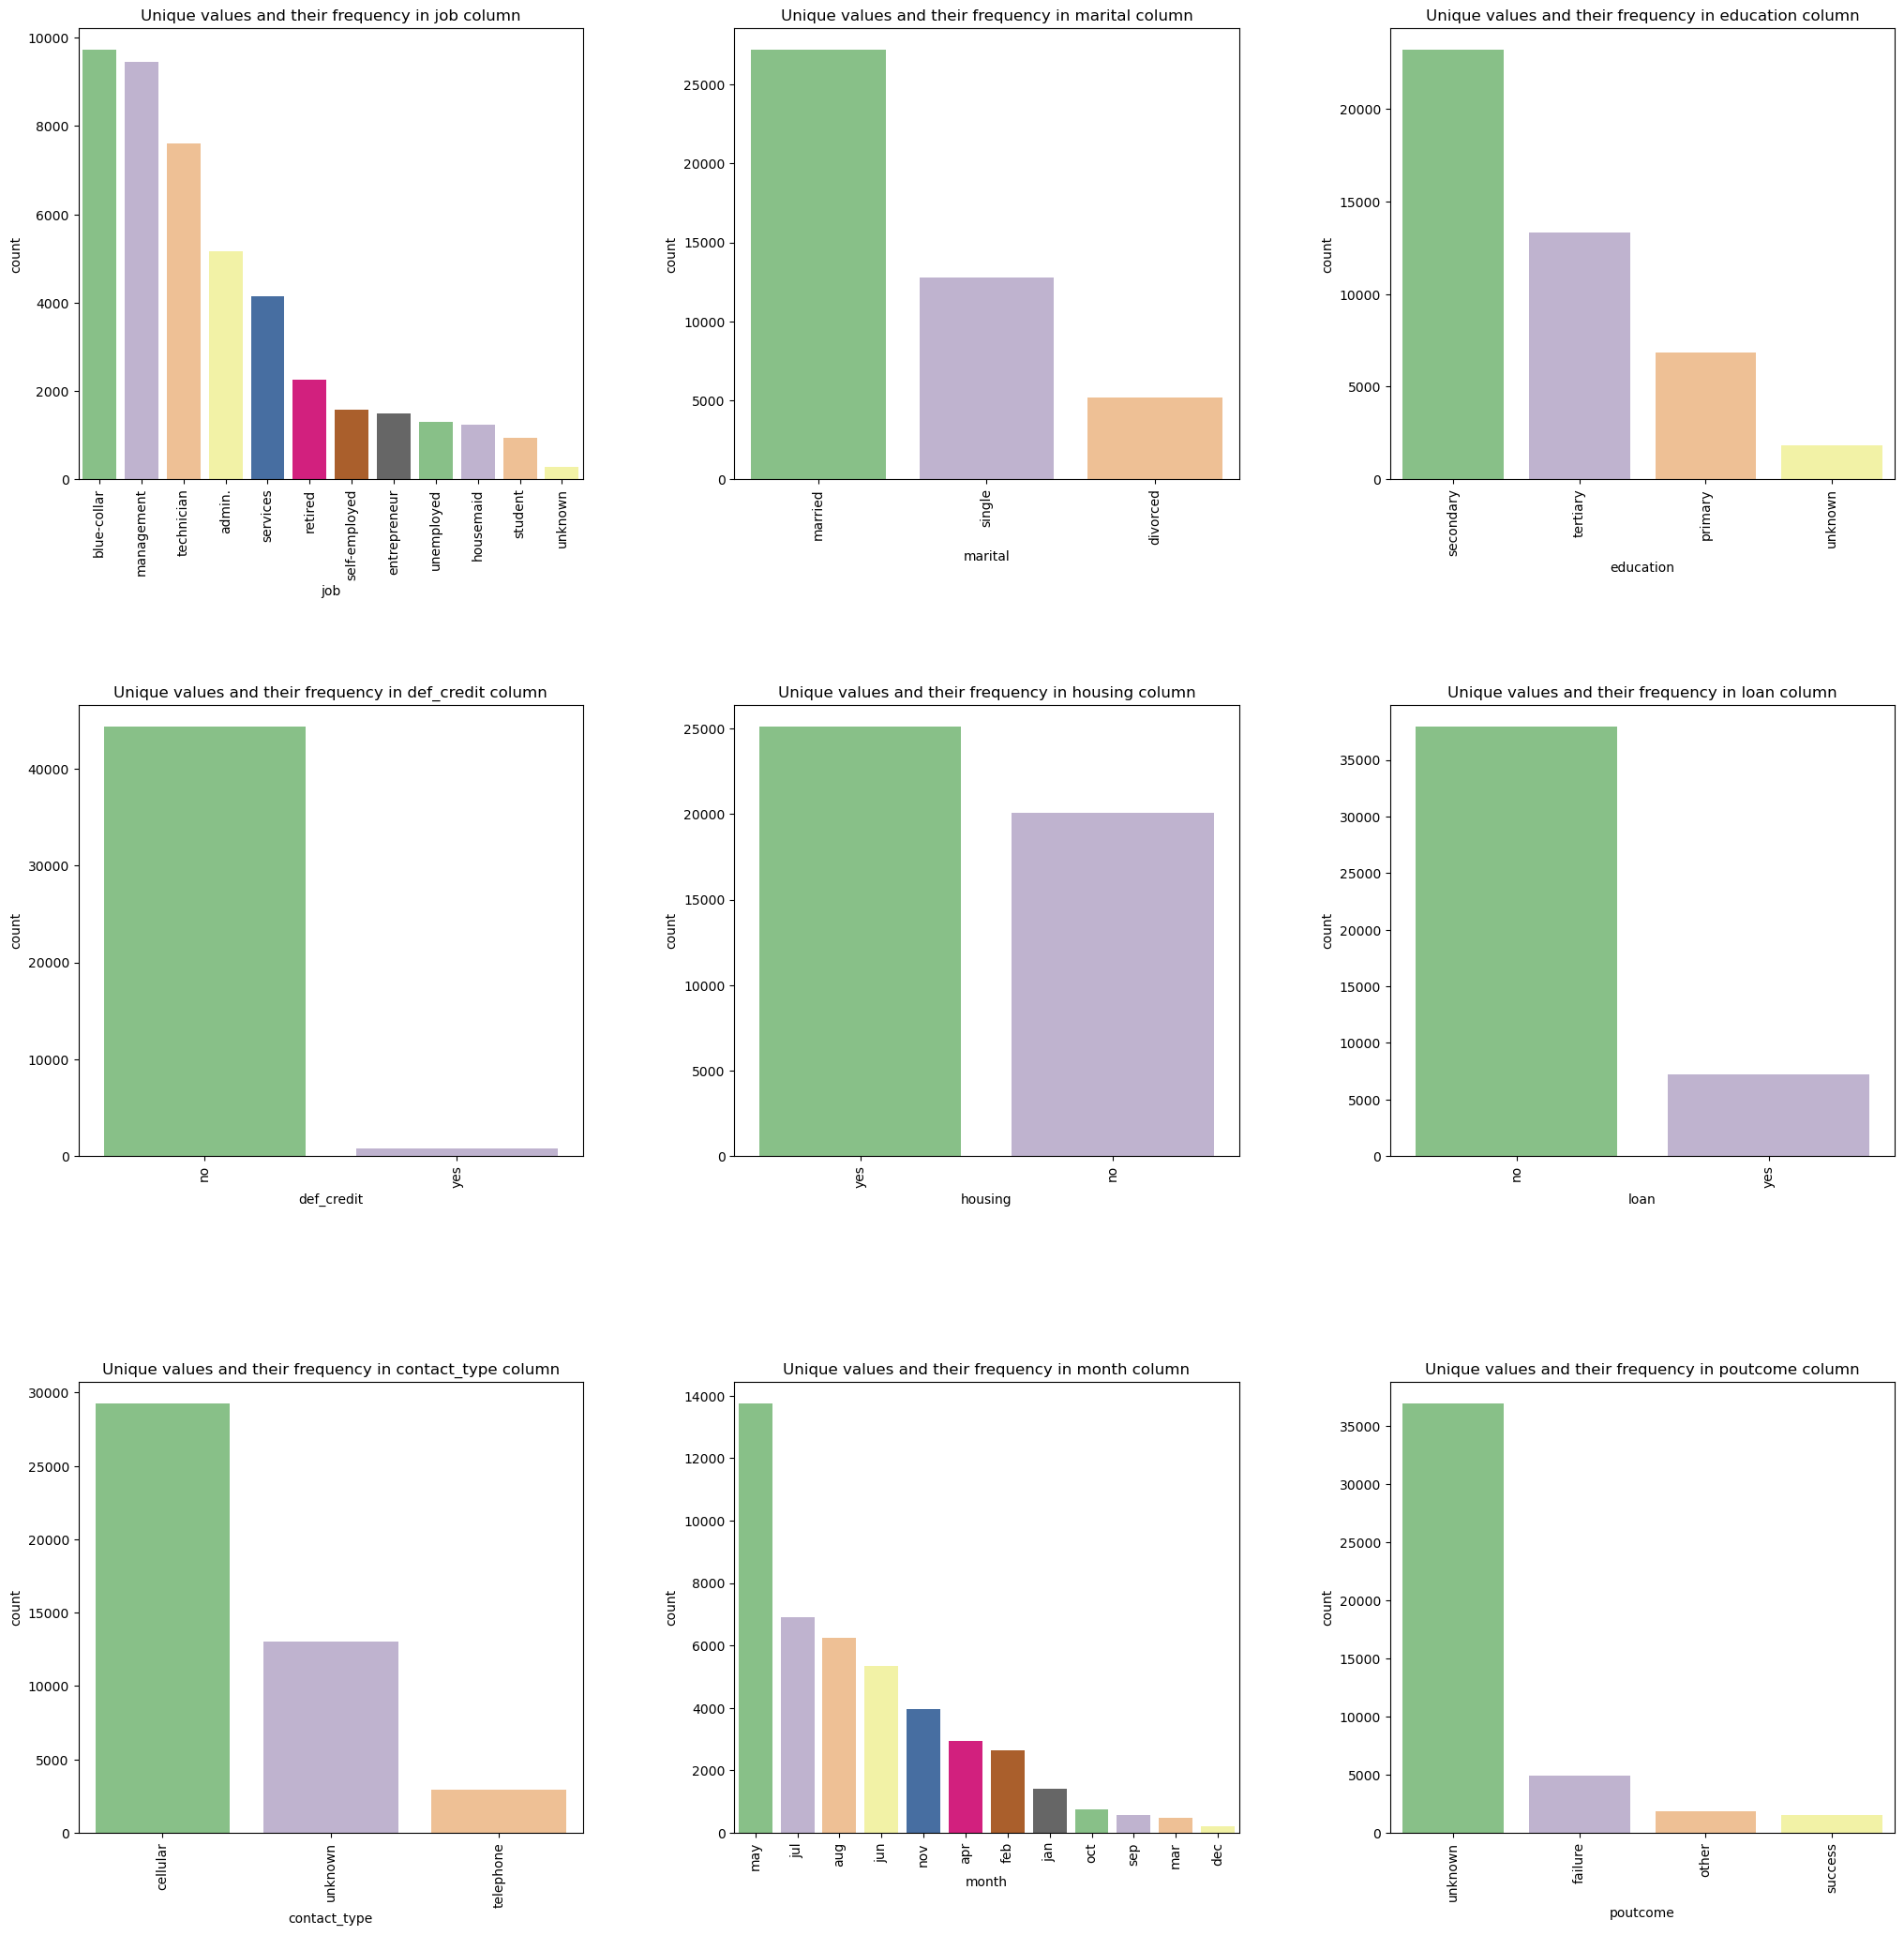

In [21]:
bar = raw_data.copy()
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(25,25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
counter = 0
for feature in cat_features:
    if feature is 'y':
        pass
    else:
        trace_x = counter // 3
        trace_y = counter % 3
        
        sns.countplot(x=feature, data=bar, palette='Accent', order=raw_data[feature].value_counts().index, ax=axs[trace_x, trace_y])
        axs[trace_x, trace_y].set_title('Unique values and their frequency in {} column'.format(feature))
        
        for tick in axs[trace_x, trace_y].get_xticklabels():
                        tick.set_rotation(90)

        counter += 1

plt.show()

### Checking the Mean,Std,Min and Max values of the Numerical features with respect to Response Variable

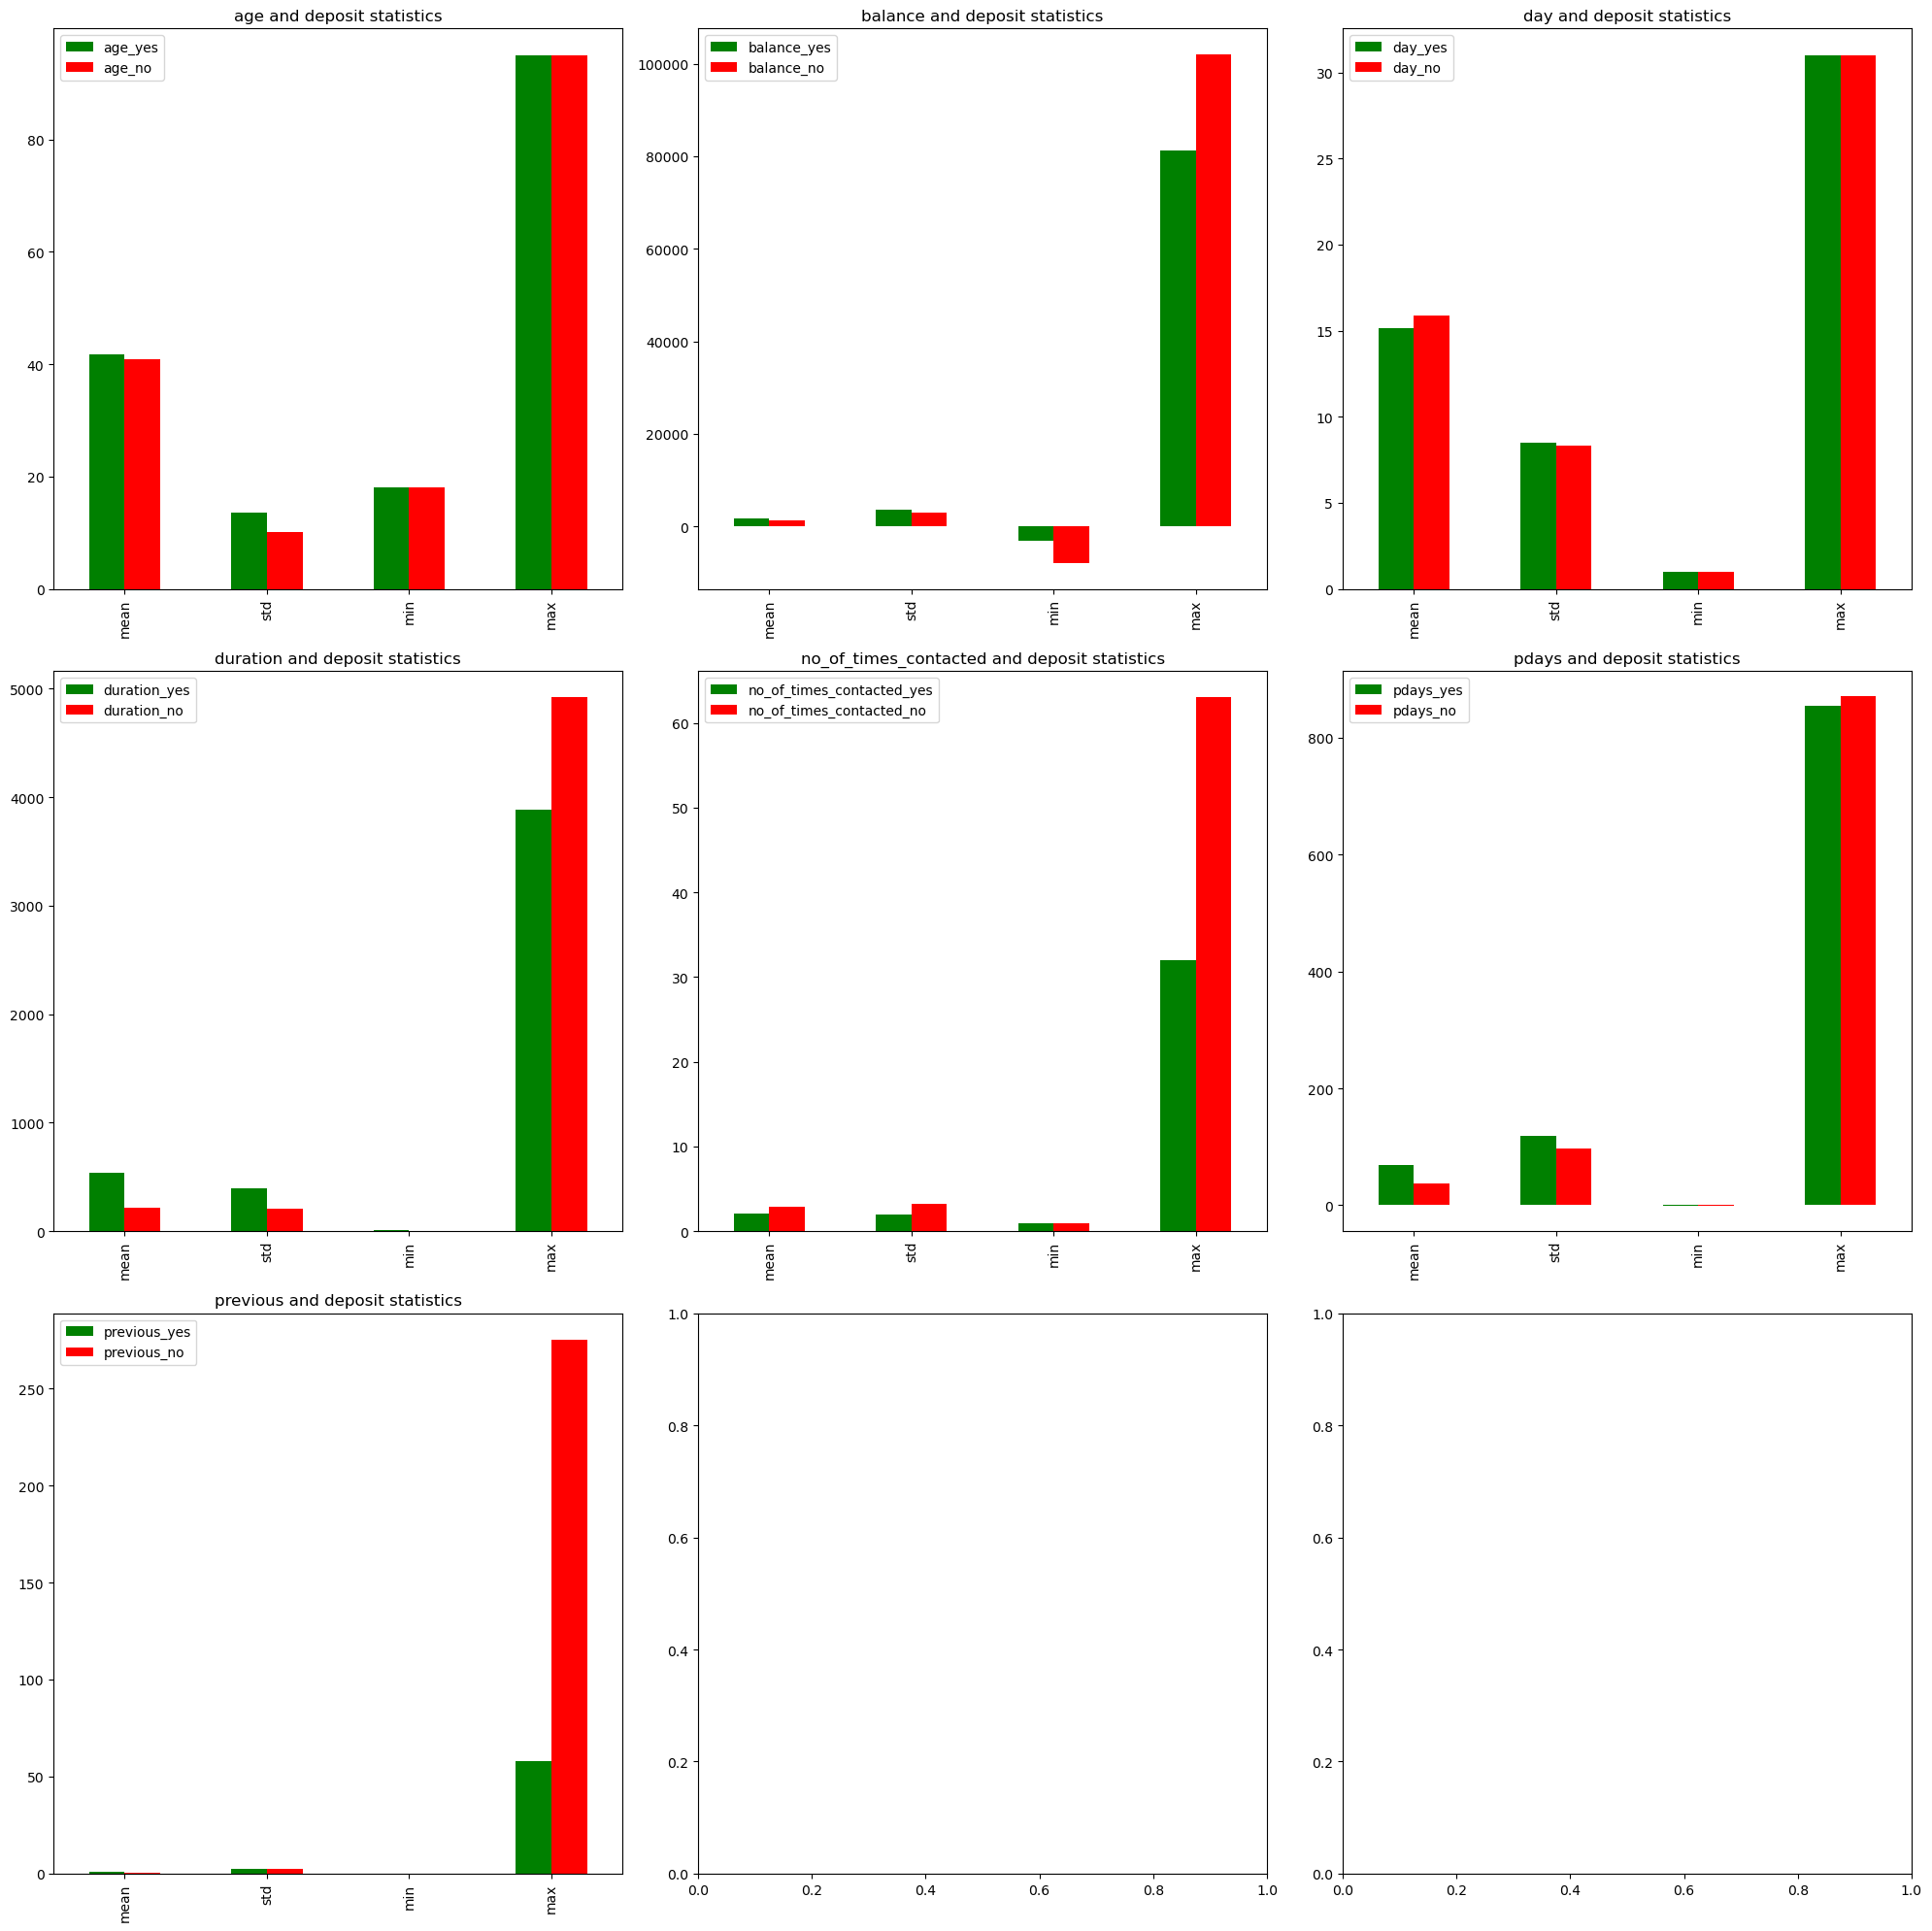

In [22]:
fig, axs = plt.subplots(3,3, sharex=False, sharey=False, figsize=(20,20))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
counter = 0
for feature in numerical_features:
    if counter<9:
        trace_x = counter // 3
        trace_y = counter % 3
        if counter<7:        
            feature_df = pd.DataFrame()
            feature_df['{}_yes'.format(feature)] = raw_data[raw_data['y']=='yes'][feature].describe()
            feature_df['{}_no'.format(feature)] = raw_data[raw_data['y']=='no'][feature].describe()
            feature_df.drop(['count', '25%', '50%', '75%']).plot.bar(title = '{} and deposit statistics'.format(feature),color =['green','red'], ax=axs[trace_x, trace_y])
        else:
            fig.delaxis(axs[trace_x, trace_y])
    else:
        break
    counter += 1
fig.tight_layout()
plt.show()

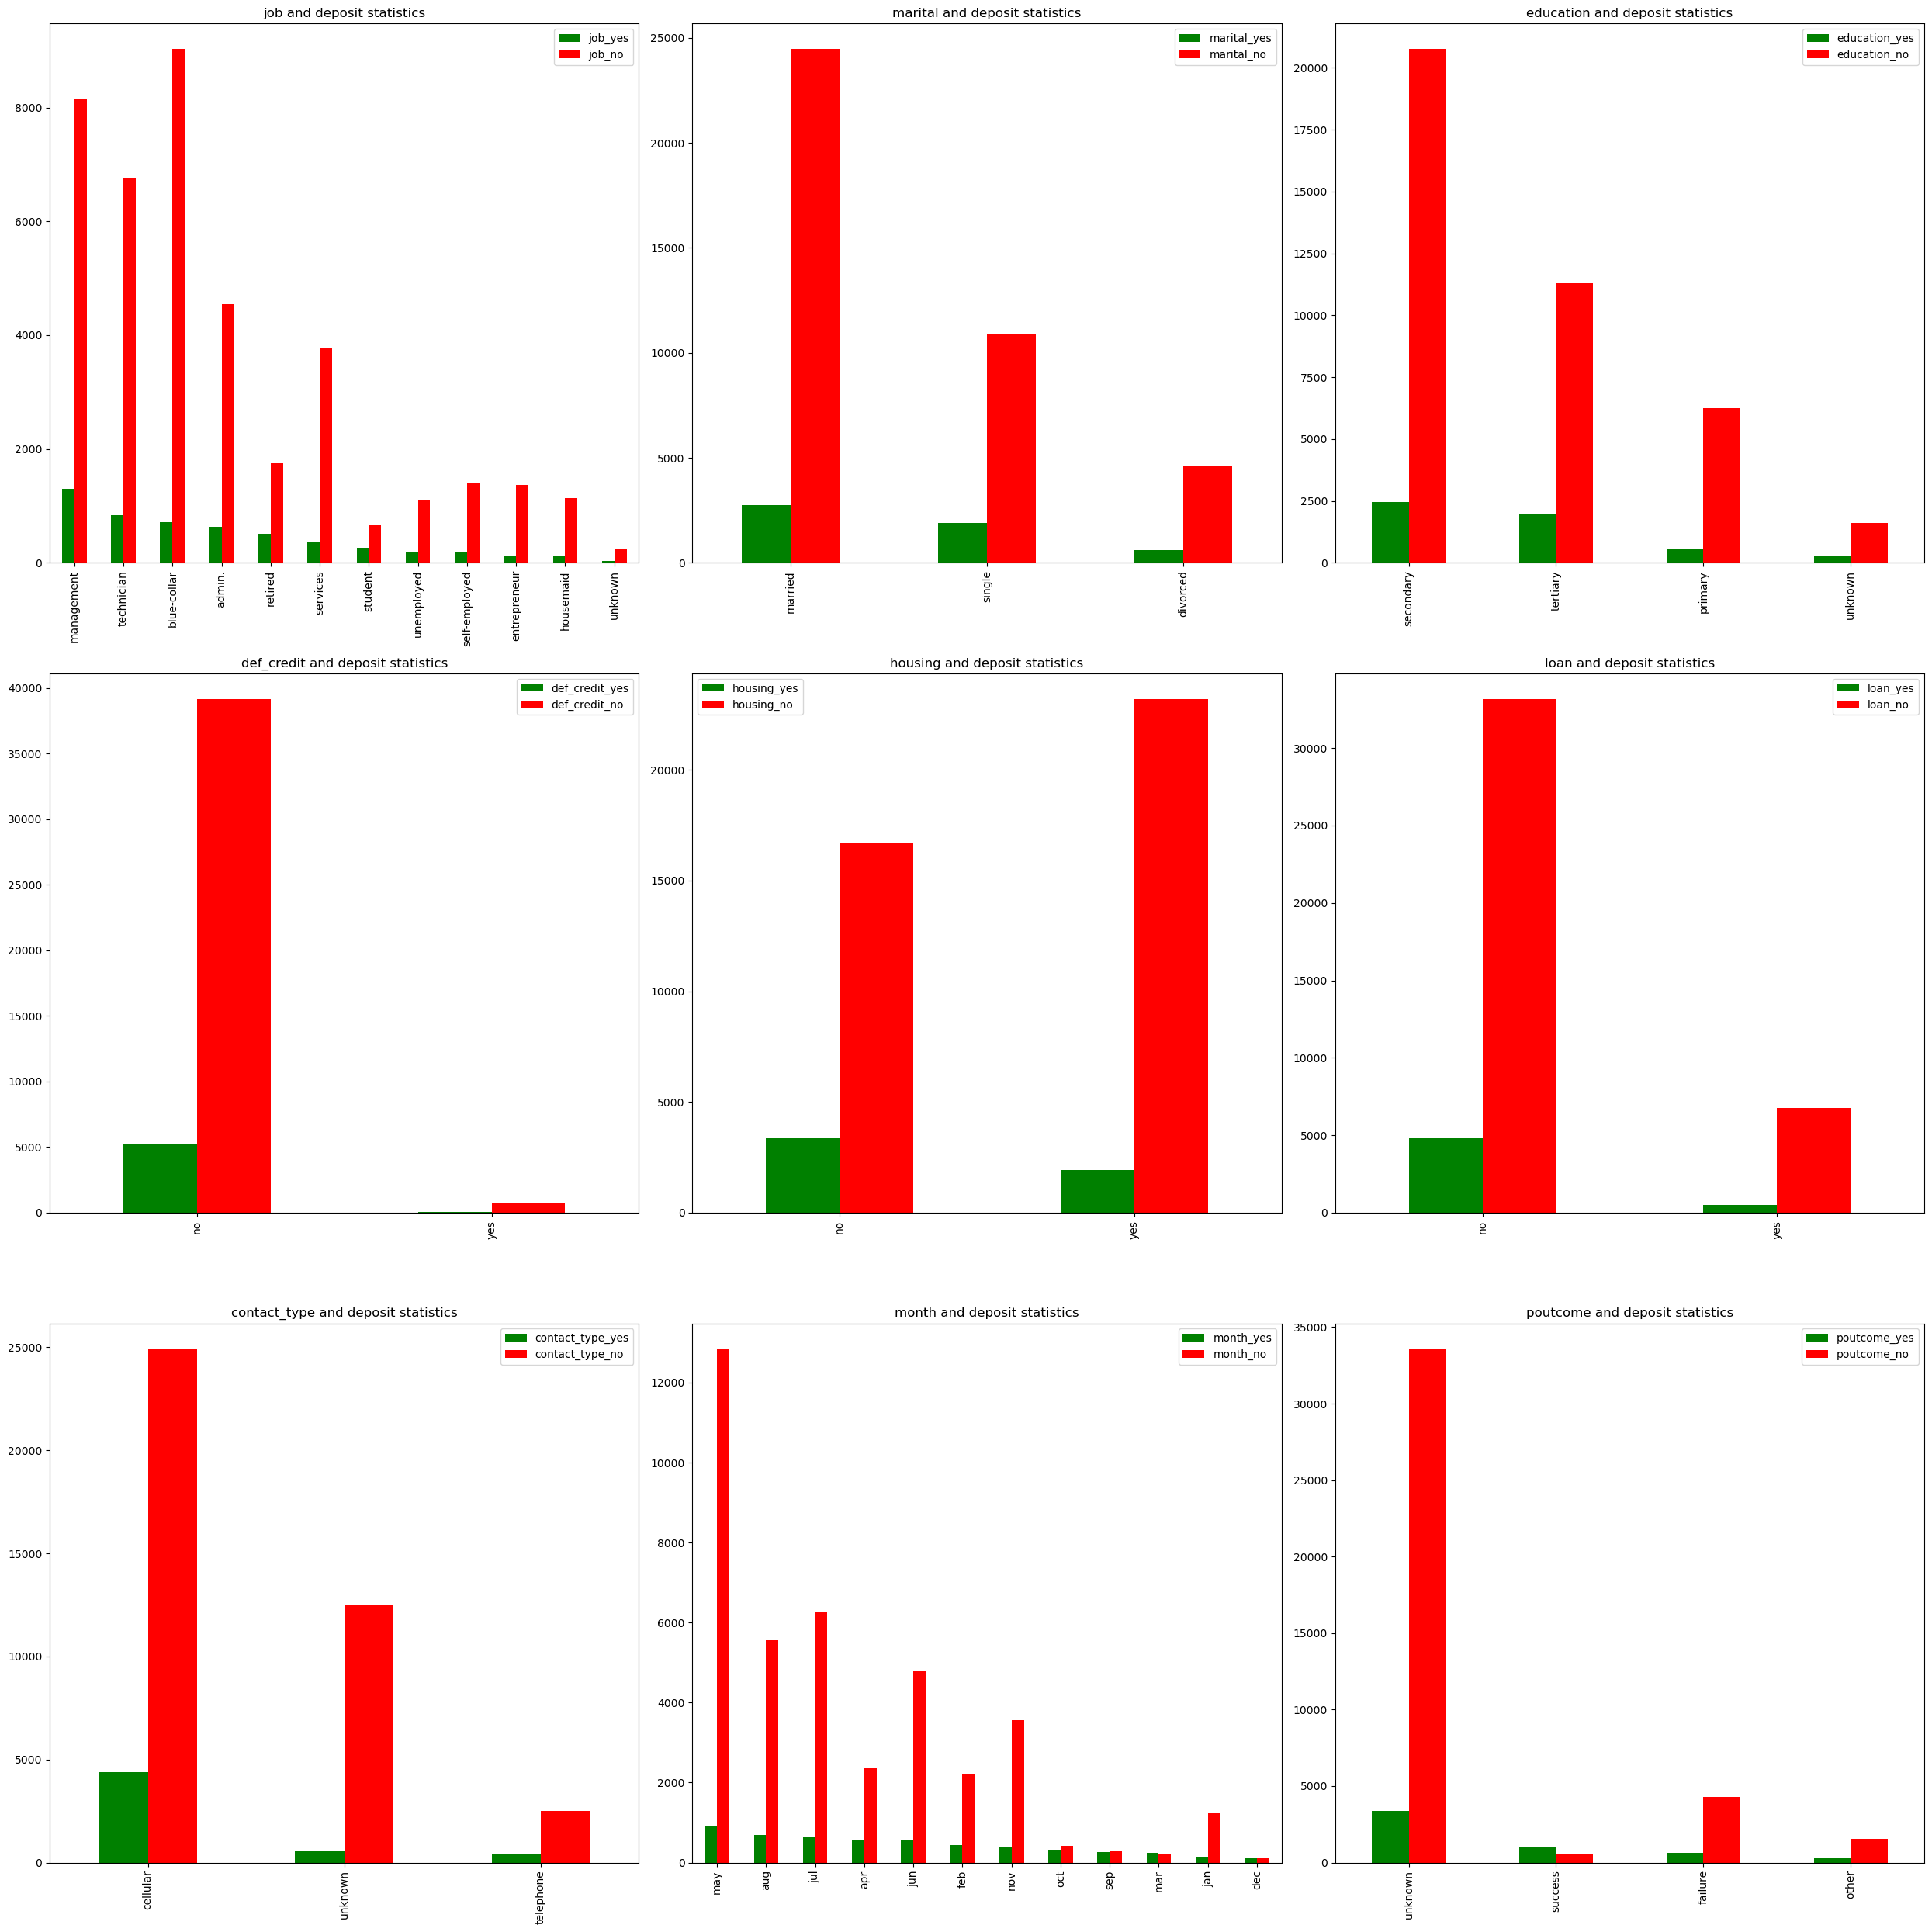

In [23]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(25,25))
plt.subplots_adjust(wspace=0.3, hspace=0.5)
counter = 0
for feature in cat_features:
    if feature is 'y':
        pass
    else:
        trace_x = counter // 3
        trace_y = counter % 3
        
        feature_df = pd.DataFrame()

        feature_df['{}_yes'.format(feature)] = raw_data[raw_data['y']=='yes'][feature].value_counts()
        feature_df['{}_no'.format(feature)] = raw_data[raw_data['y']=='no'][feature].value_counts()
    
        feature_df.plot.bar(title = '{} and deposit statistics'.format(feature),color = ('green','red'),ax=axs[trace_x, trace_y])
        counter += 1
fig.tight_layout()
plt.show()

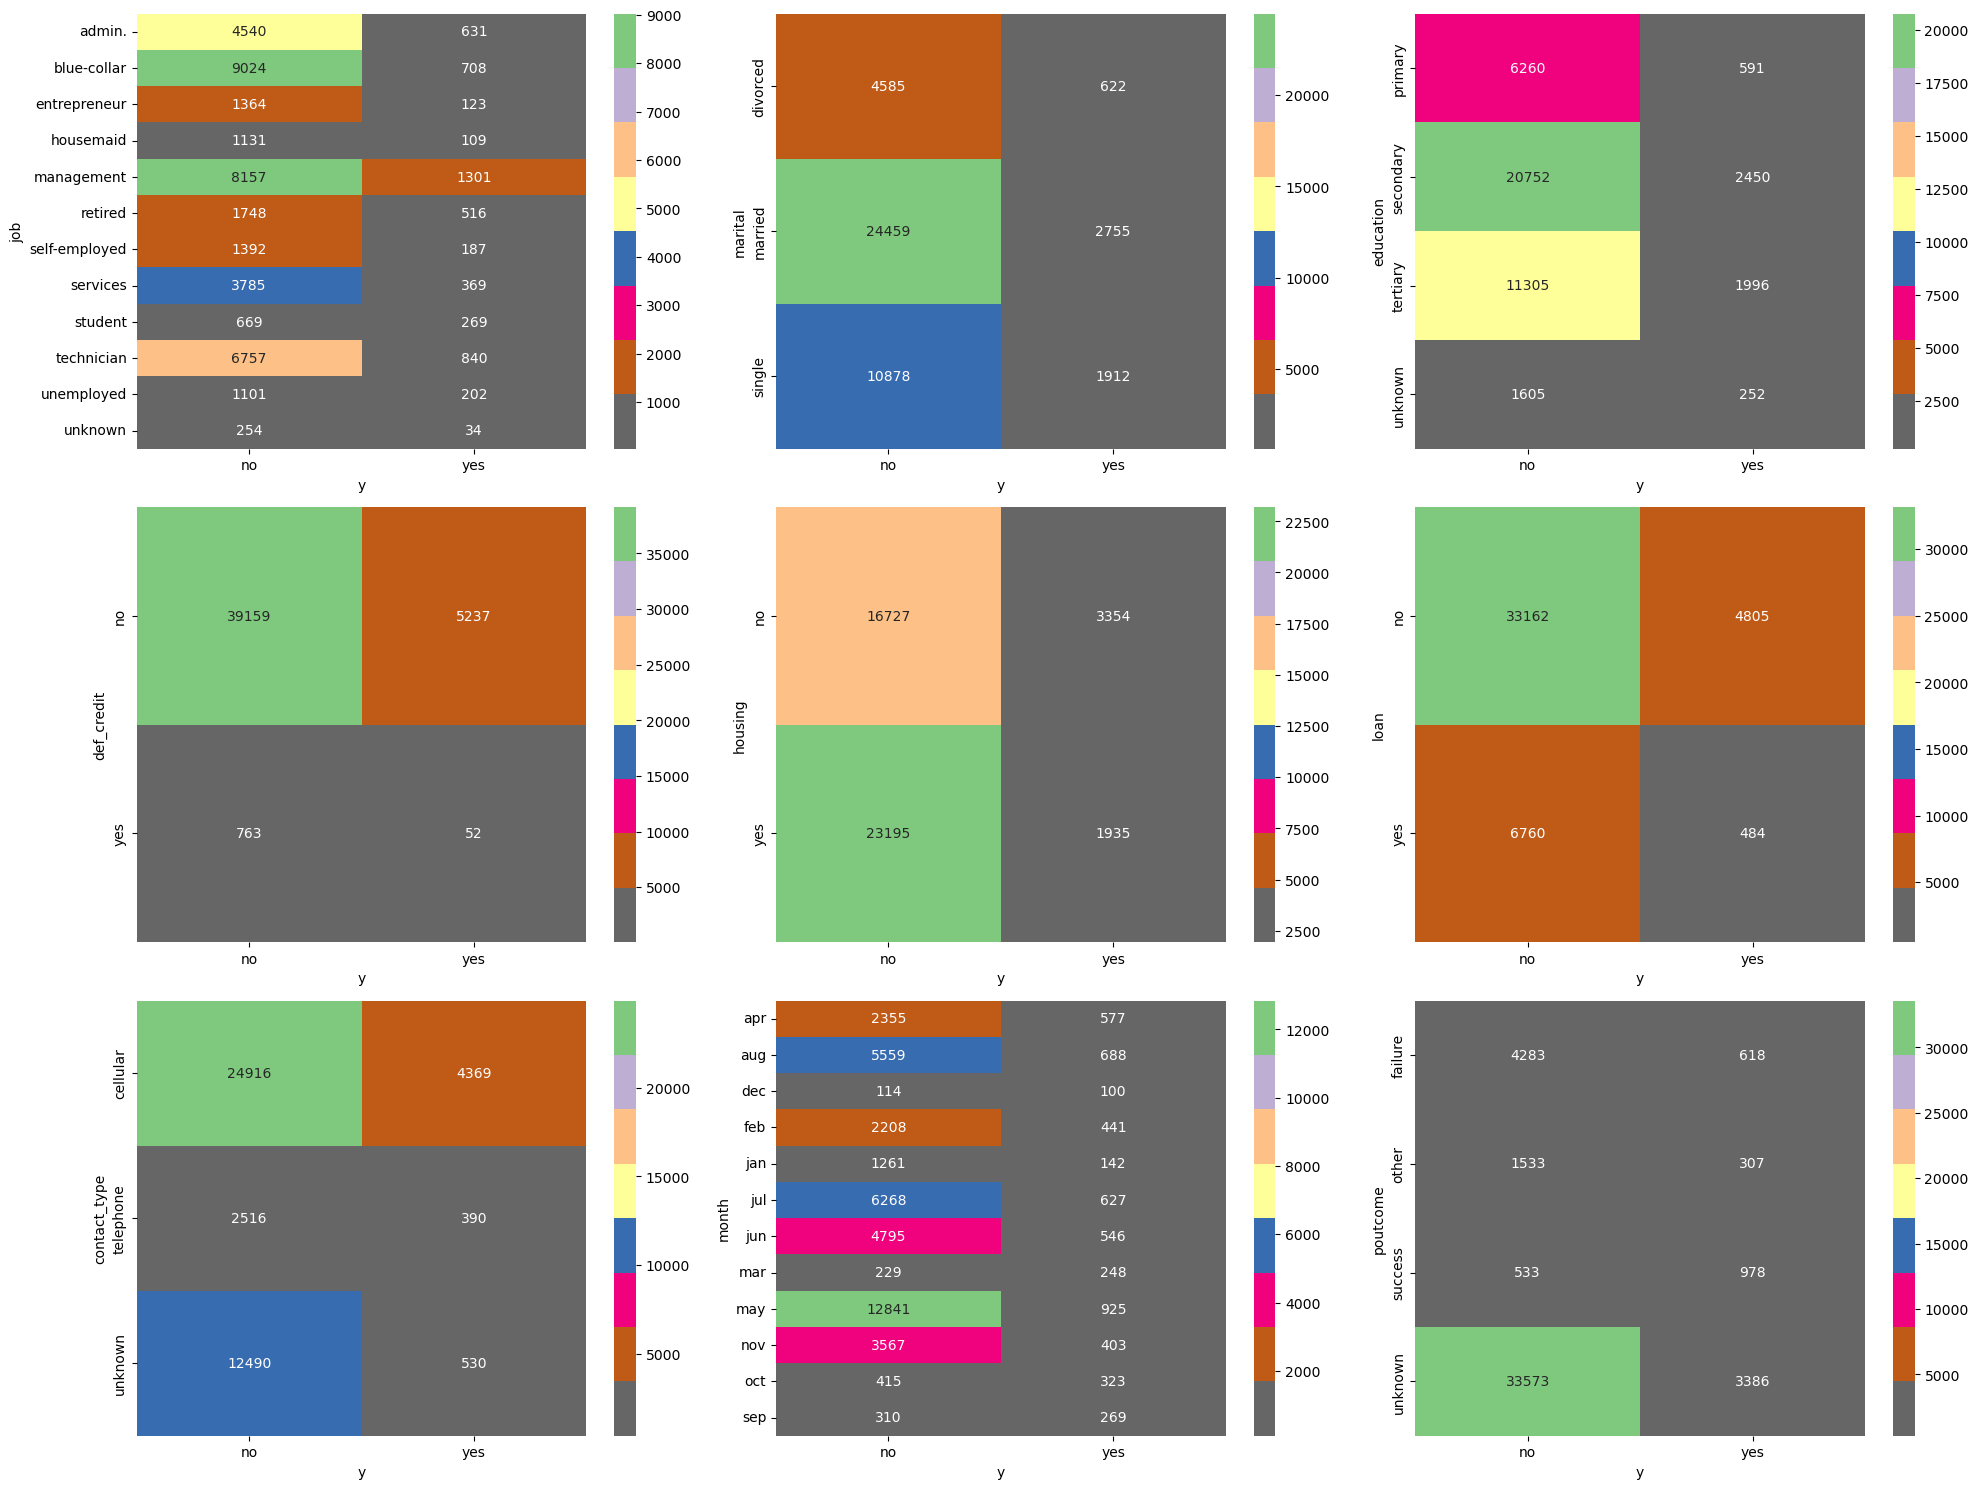

In [24]:
fig, axs = plt.subplots(3, 3, sharex=False, sharey=False, figsize=(20,15))
counter = 0
for feature in cat_features:
    if feature == 'y':
        pass
    else:
        trace_x = counter // 3
        trace_y = counter % 3
        sns.heatmap(pd.crosstab(index=raw_data[feature], columns=raw_data['y']),cmap='Accent_r', annot=True,fmt='g', ax = axs[trace_x,trace_y])
        counter += 1
fig.tight_layout()
plt.show()    

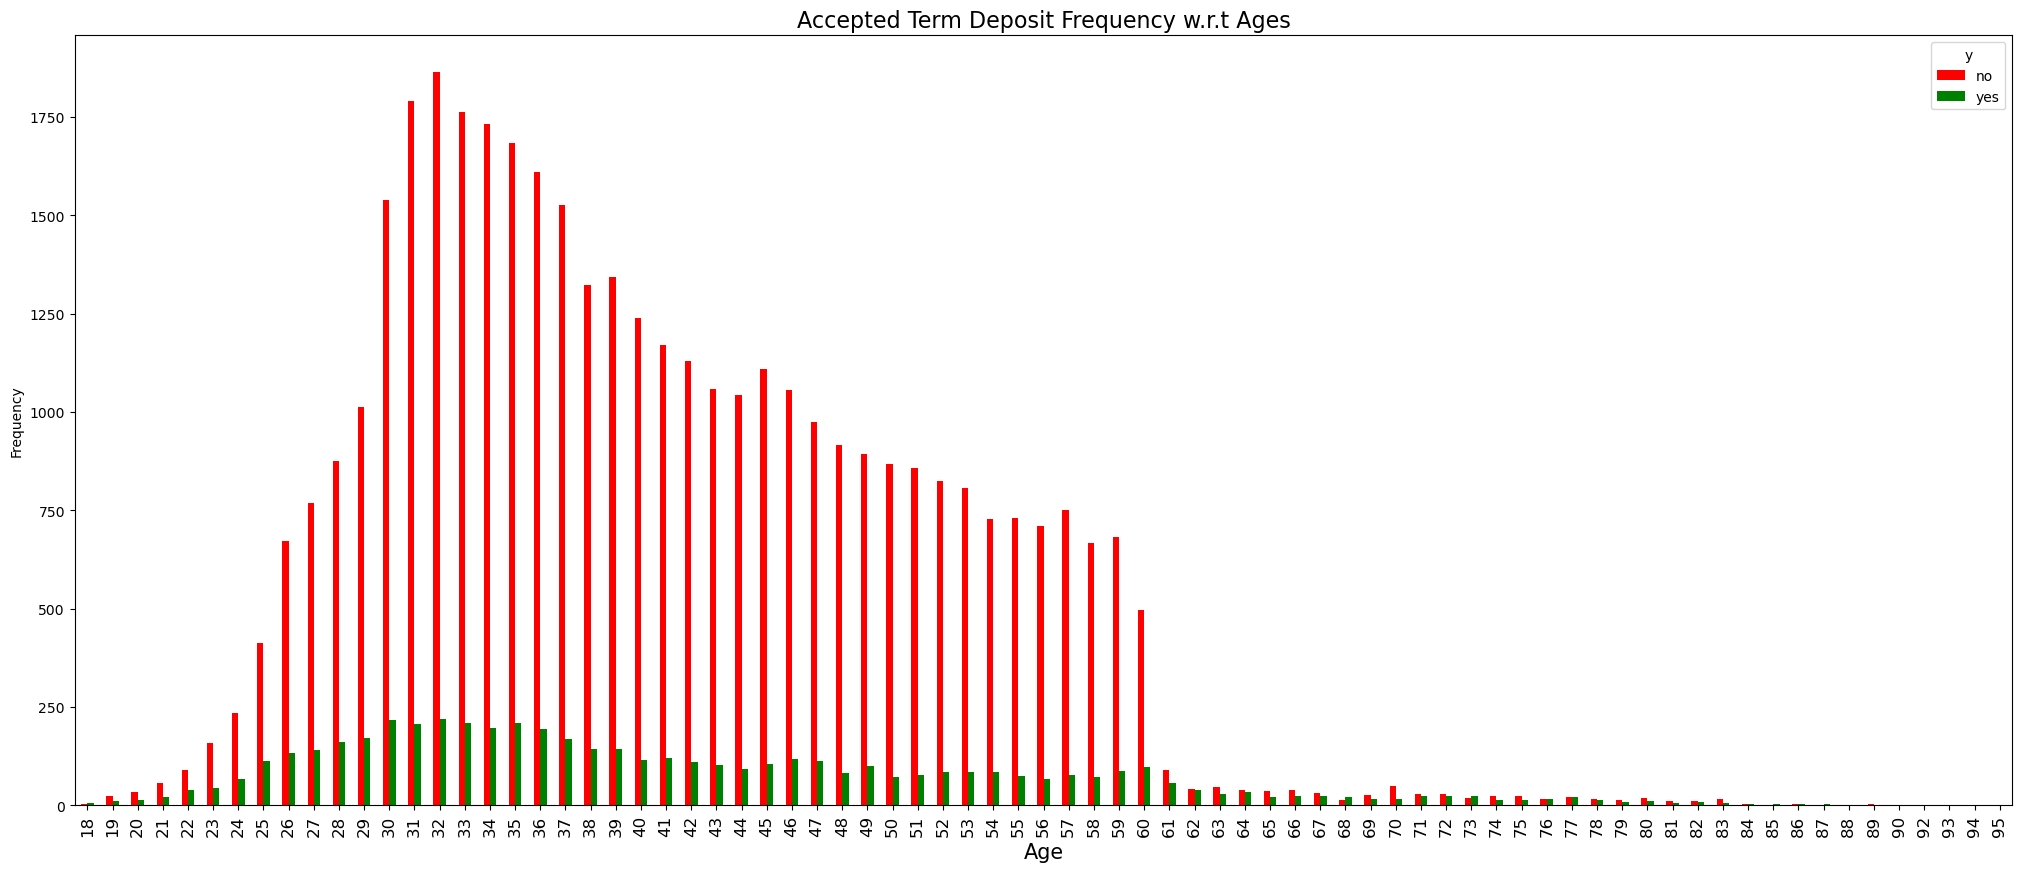

In [25]:
pd.crosstab(raw_data.age,raw_data.y).plot(kind="bar",figsize=(25,10),color = ('red','green'))
plt.title('Accepted Term Deposit Frequency w.r.t Ages', fontsize = 16)
plt.xticks(fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Frequency')
plt.show()

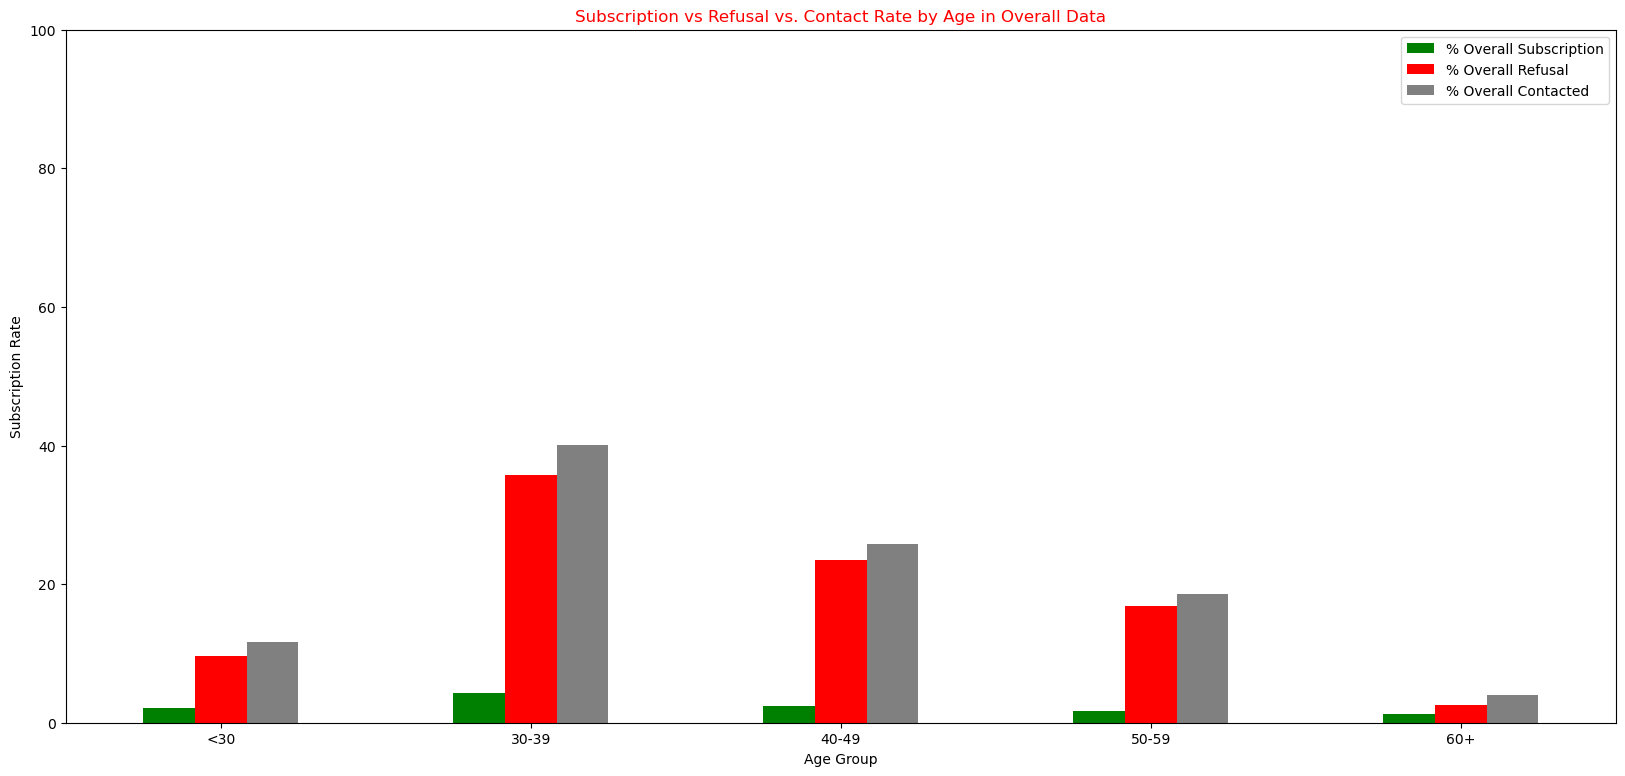

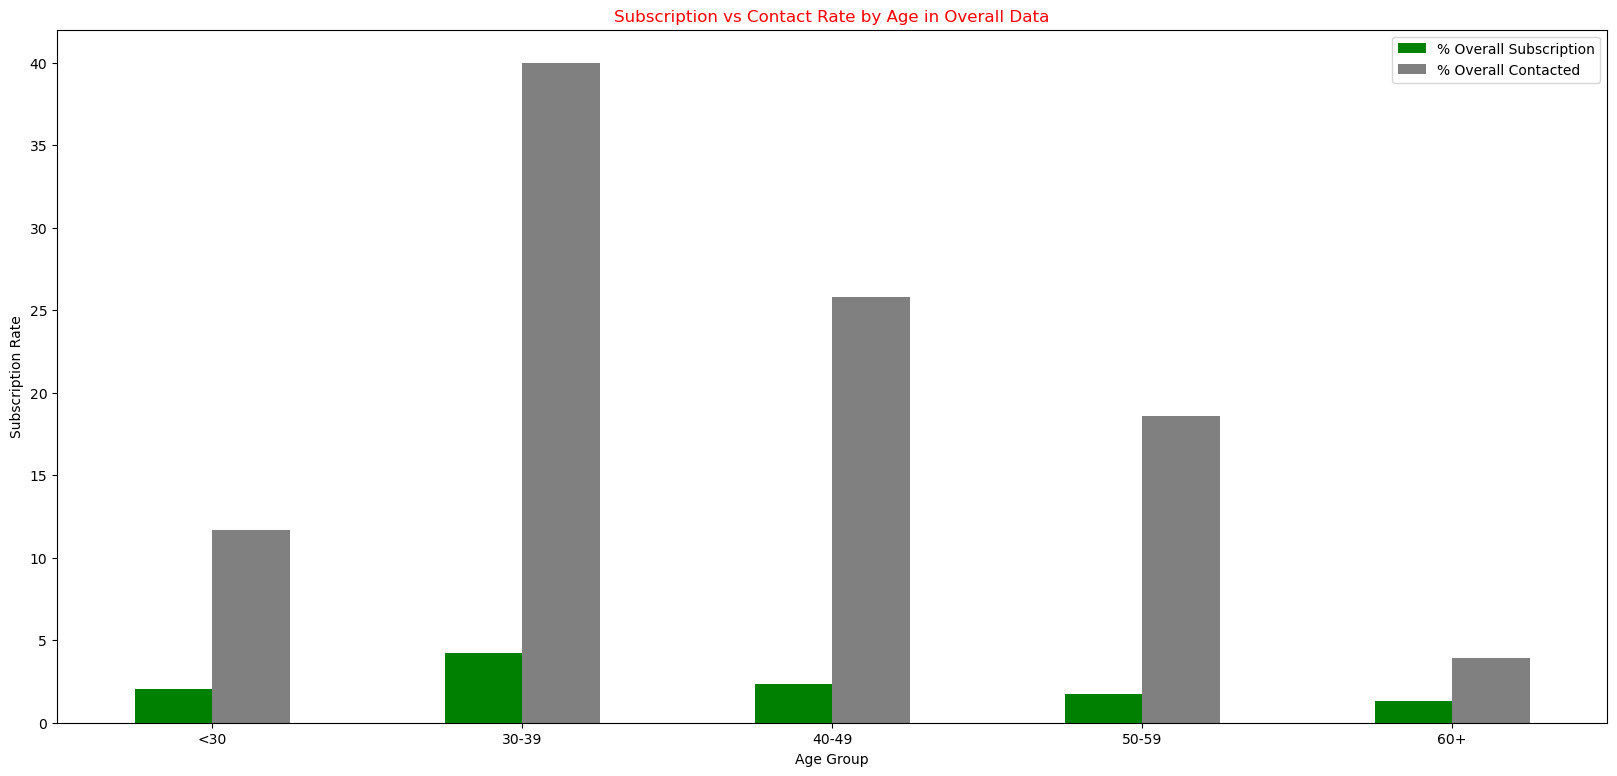

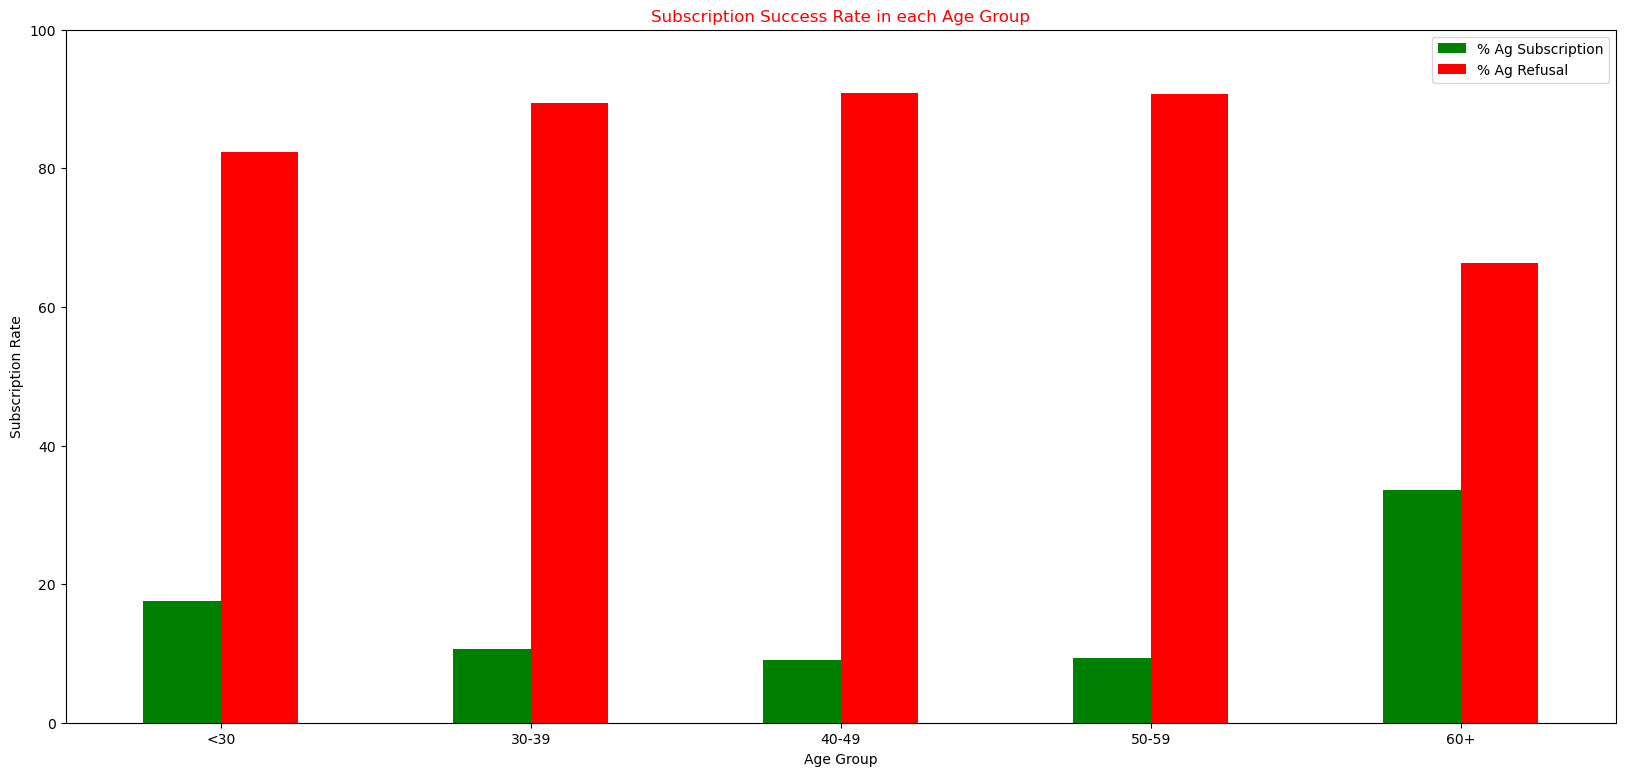

In [26]:
lst = [raw_data]
for column in lst:
    column.loc[column["age"] < 30,  'age_group'] = 20
    column.loc[(column["age"] >= 30) & (column["age"] <= 39), 'age_group'] = 30
    column.loc[(column["age"] >= 40) & (column["age"] <= 49), 'age_group'] = 40
    column.loc[(column["age"] >= 50) & (column["age"] <= 59), 'age_group'] = 50
    column.loc[column["age"] >= 60, 'age_group'] = 60
overall_count_age_response_pct = pd.crosstab(raw_data['y'],raw_data['age_group']).apply(lambda x: x*100/len(raw_data))
overall_count_age_response_pct = overall_count_age_response_pct.transpose()
count_age_response_pct = pd.crosstab(raw_data['y'],raw_data['age_group']).apply(lambda x: x*100/x.sum())
count_age_response_pct = count_age_response_pct.transpose()
age = pd.DataFrame(raw_data['age_group'].value_counts())
age['% Overall Contacted'] = age['age_group']*100/age['age_group'].sum()
age['% Overall Subscription'] = overall_count_age_response_pct['yes']
age['% Overall Refusal'] = overall_count_age_response_pct['no']
age['% Ag Subscription'] = count_age_response_pct['yes']
age['% Ag Refusal'] = count_age_response_pct['no']
age.drop('age_group',axis = 1,inplace = True)

age['age'] = [30,40,50,20,60]
age = age.sort_values('age',ascending = True)

plot_age_overall = age[['% Overall Subscription','% Overall Refusal','% Overall Contacted']].plot(kind = 'bar',
                                              ylim = [0,100],figsize=(20,9), color = ('green','red','gray'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs Refusal vs. Contact Rate by Age in Overall Data',fontdict={'color':'red'})
plt.show()

plot_sub_contaced = age[['% Overall Subscription','% Overall Contacted']].plot(kind = 'bar',
                                              figsize=(20,9), color = ('green','gray'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription vs Contact Rate by Age in Overall Data',fontdict={'color':'red'})
plt.show()


plot_age = age[['% Ag Subscription','% Ag Refusal']].plot(kind = 'bar',
                                            ylim = [0,100], figsize=(20,9), color = ('green','red'))
plt.xlabel('Age Group')
plt.ylabel('Subscription Rate')
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.title('Subscription Success Rate in each Age Group',fontdict={'color':'red'})

plt.show()

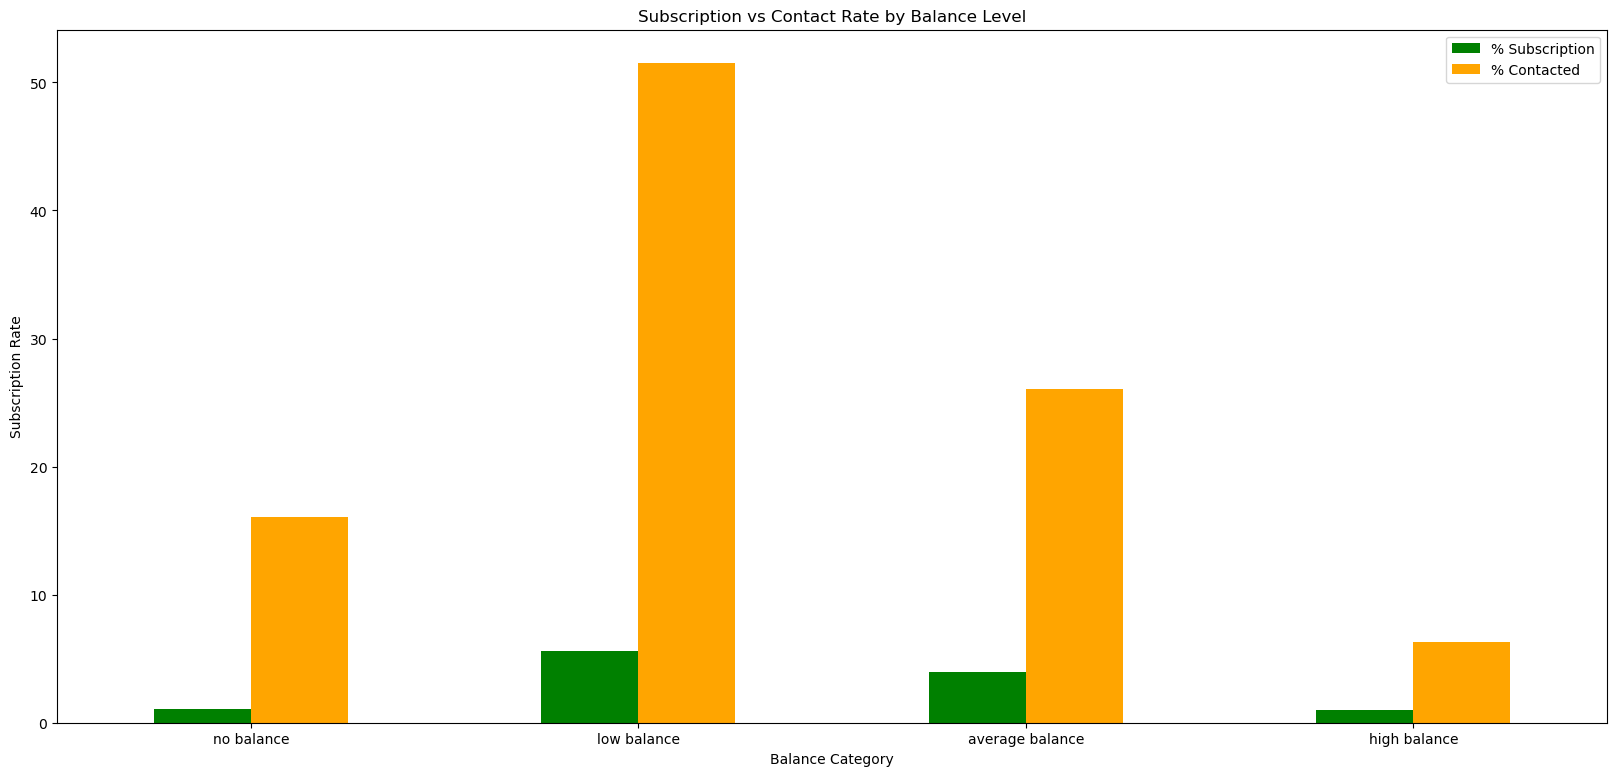

In [27]:
lst = [raw_data]
for column in lst:
    column.loc[column["balance"] <= 0,  'balance_group'] = 'no balance'
    column.loc[(column["balance"] > 0) & (column["balance"] <= 1000), 'balance_group'] = 'low balance'
    column.loc[(column["balance"] > 1000) & (column["balance"] <= 5000), 'balance_group'] = 'average balance'
    column.loc[(column["balance"] > 5000), 'balance_group'] = 'high balance'
    
count_balance_response_pct = pd.crosstab(raw_data['y'],raw_data['balance_group']).apply(lambda x: x/len(raw_data) * 100)
count_balance_response_pct = count_balance_response_pct.transpose()

bal = pd.DataFrame(raw_data['balance_group'].value_counts())
bal['% Contacted'] = bal['balance_group']*100/bal['balance_group'].sum()
bal['% Subscription'] = count_balance_response_pct['yes']
bal.drop('balance_group',axis = 1,inplace = True)

bal['bal'] = [1,2,0,3]
bal = bal.sort_values('bal',ascending = True)

plot_balance = bal[['% Subscription','% Contacted']].plot(kind = 'bar',
                                               color = ('green','orange'),
                                               figsize = (20,9))

plt.title('Subscription vs Contact Rate by Balance Level')
plt.ylabel('Subscription Rate')
plt.xlabel('Balance Category')
plt.xticks(rotation = 'horizontal')
plt.show()

In [28]:
# Step 1: Change column name: 'y' to 'response'
df  =raw_data.copy()
df.rename(columns={'y': 'response'}, inplace = True)

def convert(data, new_column, old_column):
    data[new_column] = data[old_column].apply(lambda x: 0 if x == 'no' else 1)
    return data[new_column].value_counts()

convert(df, "response_binary", "response")

0    39922
1     5289
Name: response_binary, dtype: int64

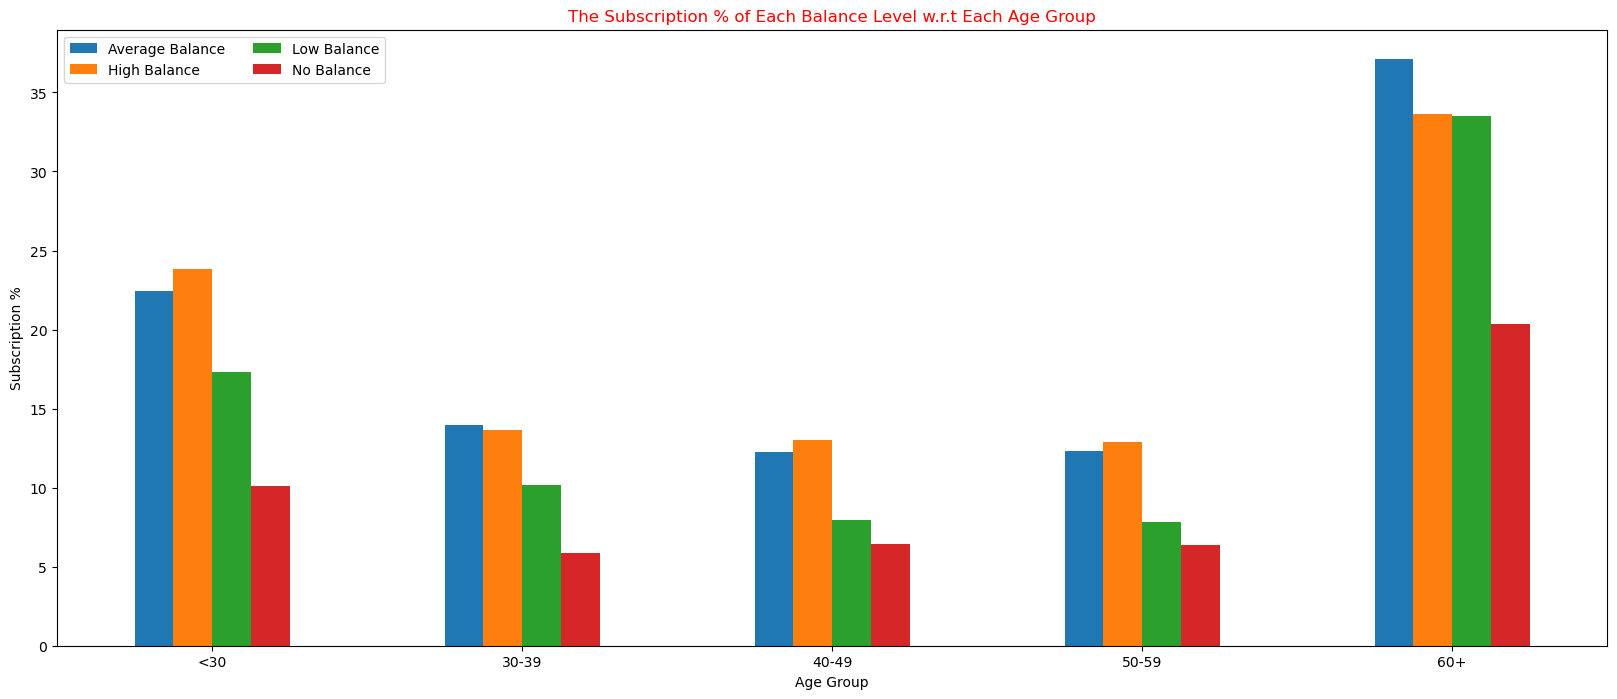

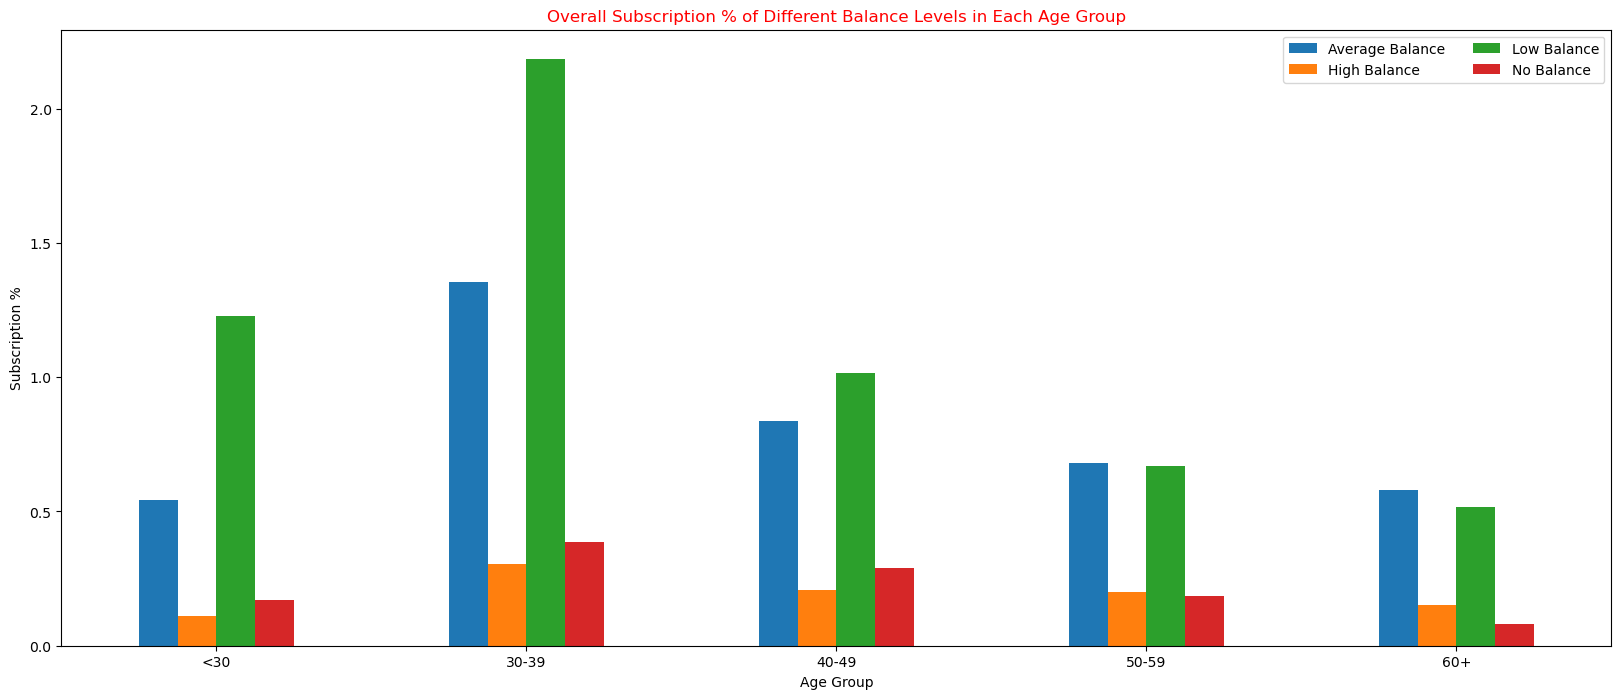

In [29]:
age_balance1 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance2 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance1['response'] = age_balance2['response']

age_balance1.rename(columns={'response_binary':'Subscribed','response':'Total'},inplace=True)
age_balance1['Subscription Rate'] = age_balance1['Subscribed']*100/age_balance1['Total']
age_balance1 = age_balance1.drop(['Subscribed','Total'],axis =1)

age_balance1 = age_balance1.unstack()
age_bal_plot1 = age_balance1.plot( kind='bar',figsize = (20,8))
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 2)
plt.ylabel('Subscription %')
plt.xlabel('Age Group')
plt.title('The Subscription % of Each Balance Level w.r.t Each Age Group',fontdict={'color':'red'})
plt.show()




age_balance3 = age_balance1.copy()
age_balance3 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response_binary'].sum())
age_balance4 = pd.DataFrame(df.groupby(['age_group','balance_group'])['response'].count())

age_balance3['response'] = age_balance4['response']

age_balance3.rename(columns={'response_binary':'Subscribed','response':'Total'},inplace=True)

age_balance3['Overall Subscription Rate'] = age_balance3['Subscribed']*100/len(df['response_binary']==1)
age_balance3 = age_balance3.drop(['Subscribed','Total'],axis =1)

age_balance3 = age_balance3.unstack()
age_bal_plot1 = age_balance3.plot( kind='bar',figsize = (20,8))
plt.xticks(np.arange(5),('<30', '30-39', '40-49', '50-59', '60+'),rotation = 'horizontal')
plt.legend(['Average Balance','High Balance','Low Balance','No Balance'],loc = 'best',ncol = 2)
plt.ylabel('Subscription %')
plt.xlabel('Age Group')
plt.title('Overall Subscription % of Different Balance Levels in Each Age Group',fontdict={'color':'red'})
plt.show()

In [30]:
age_balance1

Subscription Rate                                    
balance_group   average balance high balance low balance no balance
age_group                                                          
20.0                  22.456462    23.809524   17.310087  10.131579
30.0                  13.966735    13.676908   10.172982   5.840886
40.0                  12.233699    12.983425    7.923356   6.421569
50.0                  12.310152    12.912482    7.795215   6.344411
60.0                  37.110482    33.658537   33.477011  20.338983

In [31]:
age_balance1['Subscription Rate'].sum()

balance_group
average balance    98.077530
high balance       97.040876
low balance        76.678651
no balance         49.077428
dtype: float64

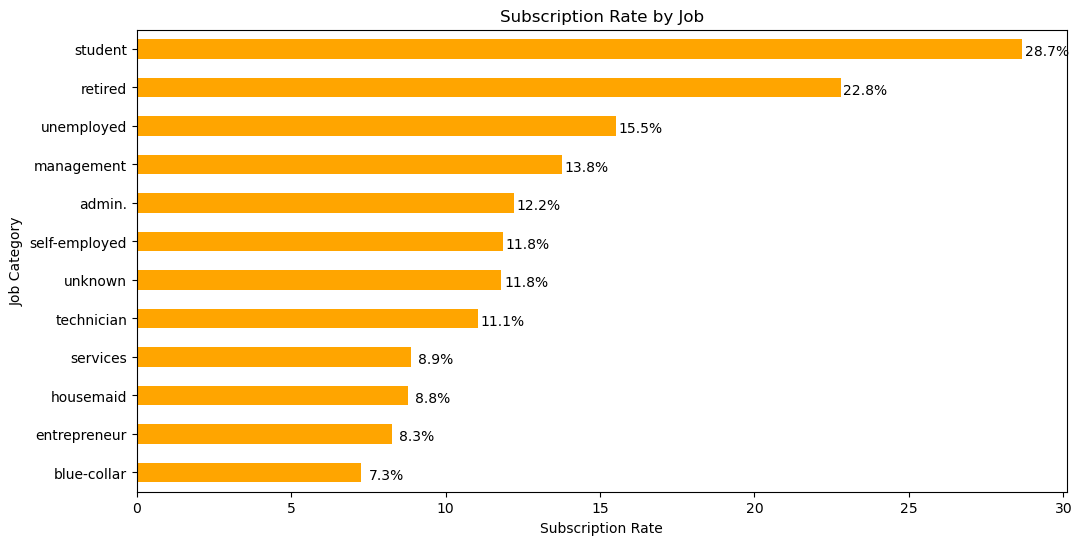

In [32]:
count_job_response_pct = pd.crosstab(df['response'],df['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                       color = ('orange'),figsize = (12,6))
                                                                               
plt.title('Subscription Rate by Job')
plt.xlabel('Subscription Rate')
plt.ylabel('Job Category')

# Label each bar
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

In [33]:
pd.crosstab(df['response'],df['job']).apply(lambda x: x/x.sum() * 100)

job,admin.,blue-collar,entrepreneur,housemaid,management,retired,self-employed,services,student,technician,unemployed,unknown
response,,,,,,,,,,,,
no,87.797331,92.725031,91.728312,91.209677,86.244449,77.208481,88.157061,91.116996,71.321962,88.943004,84.497314,88.194444
yes,12.202669,7.274969,8.271688,8.790323,13.755551,22.791519,11.842939,8.883004,28.678038,11.056996,15.502686,11.805556


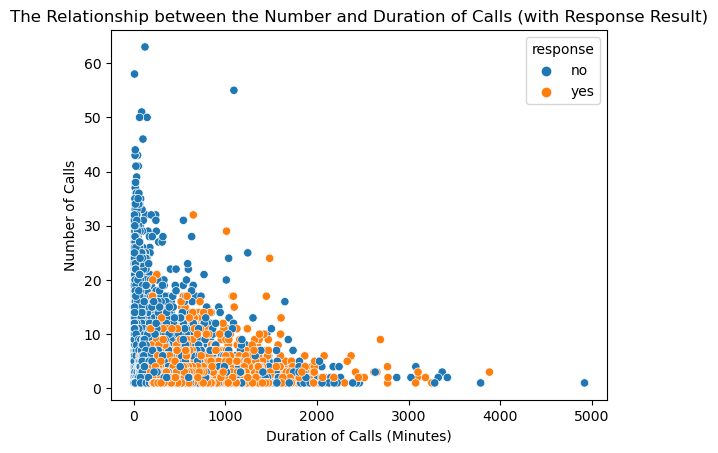

In [34]:
dur_cam = sns.scatterplot(x='duration', y='no_of_times_contacted',data = df,
                     hue = 'response')

plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

plt.show()

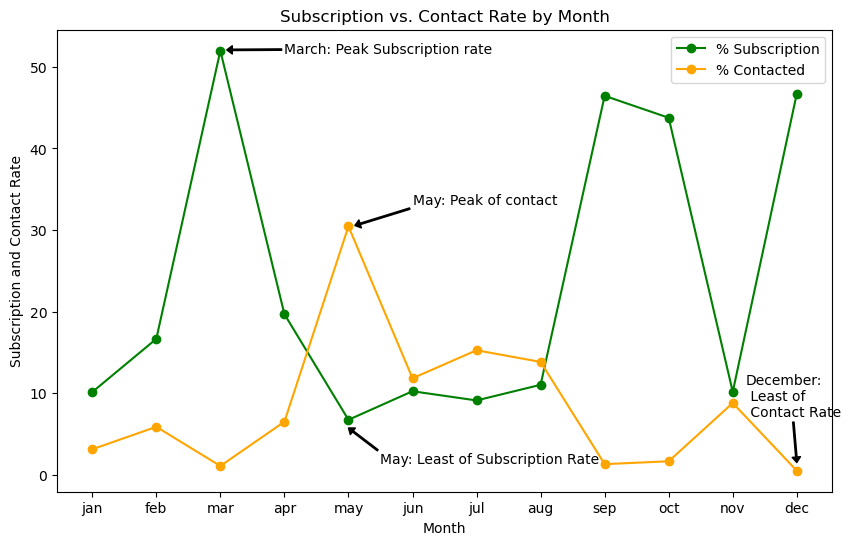

In [35]:
# Step 4: Change 'month' from words to numbers for easier analysis
order={'month':{'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}}
df=df.replace(order)

count_month_response_pct = pd.crosstab(df['response'],df['month']).apply(lambda x: x/x.sum() * 100)
count_month_response_pct = count_month_response_pct.transpose()
month = pd.DataFrame(df['month'].value_counts())
month['% Contacted'] = month['month']*100/month['month'].sum()
month['% Subscription'] = count_month_response_pct['yes']
month.drop('month',axis = 1,inplace = True)

month['Month'] = [5,7,8,6,11,4,2,1,10,9,3,12]
month = month.sort_values('Month',ascending = True)
plot_month = month[['% Subscription','% Contacted']].plot(kind ='line',
                                                     color = ('green','orange'),figsize = (10,6),
                                                          marker = 'o')

plt.title('Subscription vs. Contact Rate by Month')
plt.ylabel('Subscription and Contact Rate')
plt.xlabel('Month')
 
plt.xticks(np.arange(1,13,1),('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'))

# Annotation: peak of contact
y = month['% Contacted'].max()
x = month['% Contacted'].idxmax()
plt.annotate('May: Peak of contact', xy=(x+0.1, y+0.1), xytext=(x+1,y+4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: peak of subscription rate
y = month['% Subscription'].max()
x = month['% Subscription'].idxmax()
plt.annotate('March: Peak Subscription rate', xy=(x+0.1, y+0.1), xytext=(x+1,y+1), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: Least of contact
y = month['% Contacted'].min()
x = month['% Contacted'].idxmin()
plt.annotate('December:\n Least of\n Contact Rate', xy=(x, y+1), xytext=(x-0.8,y+12), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')

# Annotation: Least of subscription rate
y = month['% Subscription'].min()
x = month['% Subscription'].idxmin()
plt.annotate('May: Least of Subscription Rate', xy=(x, y-1), xytext=(x+0.5,y-4), arrowprops=dict(facecolor='black', headwidth=6, width=1, headlength=4), horizontalalignment='left', verticalalignment='top')
plt.show()

In [36]:
count_education_response_pct = pd.crosstab(df['response'],df['education']).apply(lambda x: x/x.sum() * 100)
count_education_response_pct = count_education_response_pct.transpose()
count_education_response_pct

response,no,yes
education,,
primary,91.373522,8.626478
secondary,89.440565,10.559435
tertiary,84.993610,15.006390
unknown,86.429725,13.570275


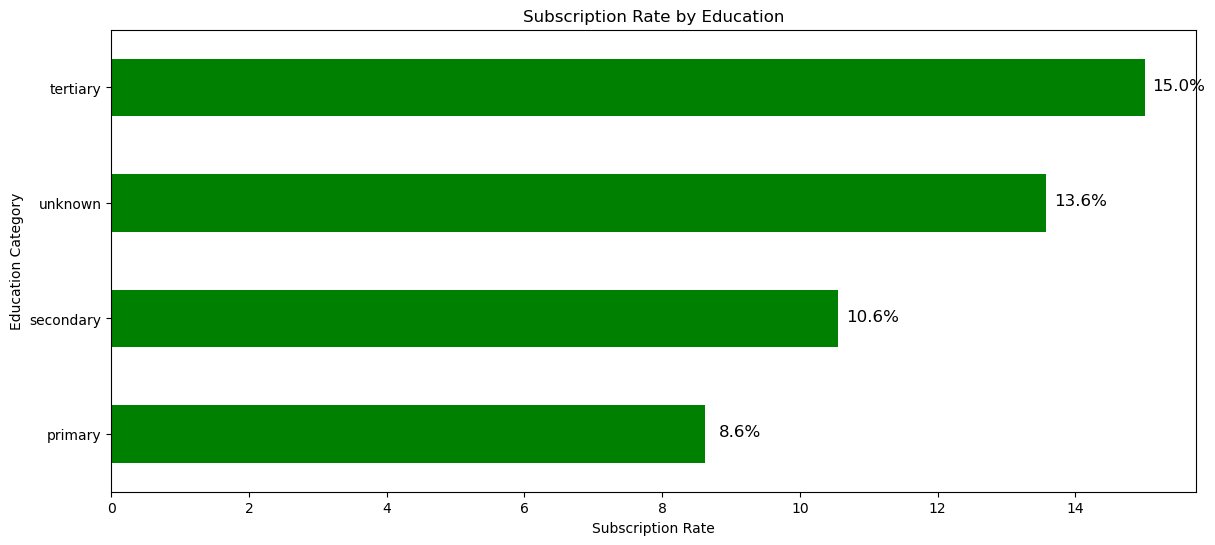

In [37]:
plot_education = count_education_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           color = ('green'),figsize = (14,6))
                                                                               
plt.title('Subscription Rate by Education')
plt.xlabel('Subscription Rate')
plt.ylabel('Education Category')

# Label each bar
for rec, label in zip(plot_education.patches,
                      count_education_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_education.text(rec.get_width()+0.5, 
                  rec.get_y()+ rec.get_height()-0.3, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom',
                fontsize = 'large')

In [38]:
unknown_cols = []
for col in cat_features:
    if 'unknown' in raw_data[col].values:
        unknown_cols.append(col)
unknown_cols    

['job', 'education', 'contact_type', 'poutcome']

In [39]:
for col in unknown_cols:
    print(col,'-',raw_data[raw_data[col]=='unknown'][col].count())

job - 288
education - 1857
contact_type - 13020
poutcome - 36959


In [40]:
# Step 2: Replace 'unknown' in job and education with 'other'
df[['job','education','contact_type','poutcome']] = df[['job','education','contact_type','poutcome']].replace(['unknown'],'other')

In [41]:
df.education.value_counts()

secondary    23202
tertiary     13301
primary       6851
other         1857
Name: education, dtype: int64

In [42]:
df['def_credit'] = np.where( df['def_credit']=='yes',1, 0)
df['housing'] = np.where(df['housing']=='yes',1,0)
df['loan'] = np.where(df['loan']=='yes',1,0)


In [43]:
df.head(1)

,age,job,marital,education,def_credit,balance,housing,loan,contact_type,day,month,duration,no_of_times_contacted,pdays,previous,poutcome,response,age_group,balance_group,response_binary
0,58,management,married,tertiary,0,2143,1,0,other,5,5,261,1,-1,0,other,no,50.0,average balance,0


In [44]:
data = df.copy()
data.drop(['response','age_group','balance_group'],axis=1,inplace=True)
data

,age,job,marital,education,def_credit,balance,housing,loan,contact_type,day,month,duration,no_of_times_contacted,pdays,previous,poutcome,response_binary
0,58,management,married,tertiary,0,2143,1,0,other,5,5,261,1,-1,0,other,0
1,44,technician,single,secondary,0,29,1,0,other,5,5,151,1,-1,0,other,0
2,33,entrepreneur,married,secondary,0,2,1,1,other,5,5,76,1,-1,0,other,0
3,47,blue-collar,married,other,0,1506,1,0,other,5,5,92,1,-1,0,other,0
4,33,other,single,other,0,1,0,0,other,5,5,198,1,-1,0,other,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,11,977,3,-1,0,other,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,11,456,2,-1,0,other,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,11,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,11,508,4,-1,0,other,0


In [45]:
categorical = data.select_dtypes(include='object')
categorical

,job,marital,education,contact_type,poutcome
0,management,married,tertiary,other,other
1,technician,single,secondary,other,other
2,entrepreneur,married,secondary,other,other
3,blue-collar,married,other,other,other
4,other,single,other,other,other
...,...,...,...,...,...
45206,technician,married,tertiary,cellular,other
45207,retired,divorced,primary,cellular,other
45208,retired,married,secondary,cellular,success
45209,blue-collar,married,secondary,telephone,other


In [46]:
dummies=pd.get_dummies(categorical)
dummies

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_other,job_retired,job_self-employed,job_services,job_student,...,education_other,education_primary,education_secondary,education_tertiary,contact_type_cellular,contact_type_other,contact_type_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,1,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
3,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
45207,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
45208,0,0,0,0,0,0,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
45209,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [47]:
data.drop(categorical.columns,axis=1,inplace=True)
data=pd.concat([data,dummies],axis=1)
data

,age,def_credit,balance,housing,loan,day,month,duration,no_of_times_contacted,pdays,...,education_other,education_primary,education_secondary,education_tertiary,contact_type_cellular,contact_type_other,contact_type_telephone,poutcome_failure,poutcome_other,poutcome_success
0,58,0,2143,1,0,5,5,261,1,-1,...,0,0,0,1,0,1,0,0,1,0
1,44,0,29,1,0,5,5,151,1,-1,...,0,0,1,0,0,1,0,0,1,0
2,33,0,2,1,1,5,5,76,1,-1,...,0,0,1,0,0,1,0,0,1,0
3,47,0,1506,1,0,5,5,92,1,-1,...,1,0,0,0,0,1,0,0,1,0
4,33,0,1,0,0,5,5,198,1,-1,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,0,825,0,0,17,11,977,3,-1,...,0,0,0,1,1,0,0,0,1,0
45207,71,0,1729,0,0,17,11,456,2,-1,...,0,1,0,0,1,0,0,0,1,0
45208,72,0,5715,0,0,17,11,1127,5,184,...,0,0,1,0,1,0,0,0,0,1
45209,57,0,668,0,0,17,11,508,4,-1,...,0,0,1,0,0,0,1,0,1,0


In [48]:
data.columns

Index(['age', 'def_credit', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'no_of_times_contacted', 'pdays', 'previous',
       'response_binary', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_other', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_other', 'education_primary',
       'education_secondary', 'education_tertiary', 'contact_type_cellular',
       'contact_type_other', 'contact_type_telephone', 'poutcome_failure',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

In [49]:
data = data[['response_binary','age', 'def_credit', 'balance', 'housing', 'loan', 'day', 'month',
       'duration', 'no_of_times_contacted', 'pdays', 'previous',
         'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_other', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_other', 'education_primary',
       'education_secondary', 'education_tertiary', 'contact_type_cellular',
       'contact_type_other', 'contact_type_telephone', 'poutcome_failure',
       'poutcome_other', 'poutcome_success']]


In [50]:
data

,response_binary,age,def_credit,balance,housing,loan,day,month,duration,no_of_times_contacted,...,education_other,education_primary,education_secondary,education_tertiary,contact_type_cellular,contact_type_other,contact_type_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0,58,0,2143,1,0,5,5,261,1,...,0,0,0,1,0,1,0,0,1,0
1,0,44,0,29,1,0,5,5,151,1,...,0,0,1,0,0,1,0,0,1,0
2,0,33,0,2,1,1,5,5,76,1,...,0,0,1,0,0,1,0,0,1,0
3,0,47,0,1506,1,0,5,5,92,1,...,1,0,0,0,0,1,0,0,1,0
4,0,33,0,1,0,0,5,5,198,1,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,51,0,825,0,0,17,11,977,3,...,0,0,0,1,1,0,0,0,1,0
45207,1,71,0,1729,0,0,17,11,456,2,...,0,1,0,0,1,0,0,0,1,0
45208,1,72,0,5715,0,0,17,11,1127,5,...,0,0,1,0,1,0,0,0,0,1
45209,0,57,0,668,0,0,17,11,508,4,...,0,0,1,0,0,0,1,0,1,0


In [51]:
scaled_data = data.copy()
column_name= ['balance','age','duration', 'no_of_times_contacted', 'pdays', 'previous']
features = scaled_data[column_name]
rest = [col for col in data.columns if col not in features]

scaler = StandardScaler()
features = scaler.fit_transform(features.values)
scaled_data = pd.DataFrame(features, columns = column_name)
scaled_data[rest] = data[rest]
scaled_data

,balance,age,duration,no_of_times_contacted,pdays,previous,response_binary,def_credit,housing,loan,...,education_other,education_primary,education_secondary,education_tertiary,contact_type_cellular,contact_type_other,contact_type_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0.256419,1.606965,0.011016,-0.569351,-0.411453,-0.251940,0,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,-0.437895,0.288529,-0.416127,-0.569351,-0.411453,-0.251940,0,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,-0.446762,-0.747384,-0.707361,-0.569351,-0.411453,-0.251940,0,0,1,1,...,0,0,1,0,0,1,0,0,1,0
3,0.047205,0.571051,-0.645231,-0.569351,-0.411453,-0.251940,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
4,-0.447091,-0.747384,-0.233620,-0.569351,-0.411453,-0.251940,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,-0.176460,0.947747,2.791329,0.076230,-0.411453,-0.251940,1,0,0,0,...,0,0,0,1,1,0,0,0,1,0
45207,0.120447,2.831227,0.768224,-0.246560,-0.411453,-0.251940,1,0,0,0,...,0,1,0,0,1,0,0,0,1,0
45208,1.429593,2.925401,3.373797,0.721811,1.436189,1.050473,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
45209,-0.228024,1.512791,0.970146,0.399020,-0.411453,-0.251940,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [52]:
scaled_data.columns

Index(['balance', 'age', 'duration', 'no_of_times_contacted', 'pdays',
       'previous', 'response_binary', 'def_credit', 'housing', 'loan', 'day',
       'month', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_other', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_other', 'education_primary',
       'education_secondary', 'education_tertiary', 'contact_type_cellular',
       'contact_type_other', 'contact_type_telephone', 'poutcome_failure',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

In [53]:
scaled_data = scaled_data[['response_binary','balance', 'age', 'duration', 'no_of_times_contacted', 'pdays',
       'previous', 'def_credit', 'housing', 'loan', 'day',
       'month', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_other', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'marital_divorced', 'marital_married',
       'marital_single', 'education_other', 'education_primary',
       'education_secondary', 'education_tertiary', 'contact_type_cellular',
       'contact_type_other', 'contact_type_telephone', 'poutcome_failure',
       'poutcome_other', 'poutcome_success']]
scaled_data

,response_binary,balance,age,duration,no_of_times_contacted,pdays,previous,def_credit,housing,loan,...,education_other,education_primary,education_secondary,education_tertiary,contact_type_cellular,contact_type_other,contact_type_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0,0.256419,1.606965,0.011016,-0.569351,-0.411453,-0.251940,0,1,0,...,0,0,0,1,0,1,0,0,1,0
1,0,-0.437895,0.288529,-0.416127,-0.569351,-0.411453,-0.251940,0,1,0,...,0,0,1,0,0,1,0,0,1,0
2,0,-0.446762,-0.747384,-0.707361,-0.569351,-0.411453,-0.251940,0,1,1,...,0,0,1,0,0,1,0,0,1,0
3,0,0.047205,0.571051,-0.645231,-0.569351,-0.411453,-0.251940,0,1,0,...,1,0,0,0,0,1,0,0,1,0
4,0,-0.447091,-0.747384,-0.233620,-0.569351,-0.411453,-0.251940,0,0,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,1,-0.176460,0.947747,2.791329,0.076230,-0.411453,-0.251940,0,0,0,...,0,0,0,1,1,0,0,0,1,0
45207,1,0.120447,2.831227,0.768224,-0.246560,-0.411453,-0.251940,0,0,0,...,0,1,0,0,1,0,0,0,1,0
45208,1,1.429593,2.925401,3.373797,0.721811,1.436189,1.050473,0,0,0,...,0,0,1,0,1,0,0,0,0,1
45209,0,-0.228024,1.512791,0.970146,0.399020,-0.411453,-0.251940,0,0,0,...,0,0,1,0,0,0,1,0,1,0


In [54]:
x = scaled_data.iloc[:,1:]
y = scaled_data.iloc[:,0]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print('Train data size',x_train.shape,'\nTest data Size',x_test.shape)

Train data size (36168, 36) 
Test data Size (9043, 36)


In [55]:
clf = LogisticRegression()
clf.fit(x_train,y_train)

LogisticRegression()

In [56]:
y_pred_train = clf.predict(x_train)
print('Classification Report for Test data\n\n')
print(classification_report(y_train,y_pred_train))
cm = confusion_matrix(y_train,y_pred_train)
print('Confusion Matrix for Train data\n',cm)

Classification Report for Test data


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     31970
           1       0.65      0.32      0.43      4198

    accuracy                           0.90     36168
   macro avg       0.78      0.65      0.69     36168
weighted avg       0.89      0.90      0.89     36168

Confusion Matrix for Train data
 [[31232   738]
 [ 2844  1354]]


In [57]:
auc

<function sklearn.metrics._ranking.auc(x, y)>

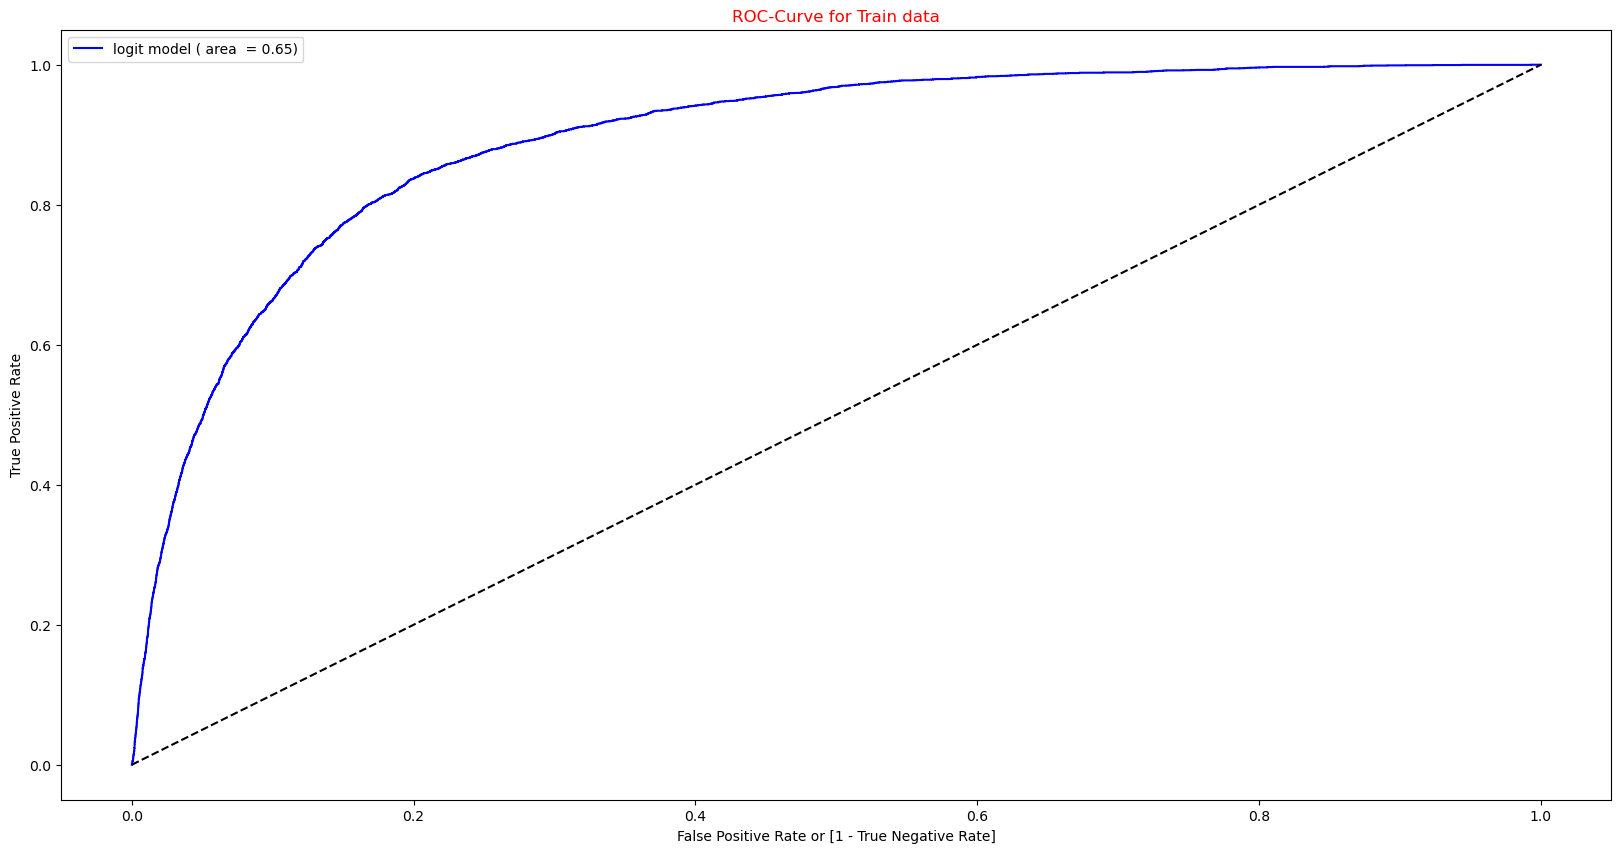

In [58]:
fpr,tpr,thresholds = roc_curve(y_train, clf.predict_proba(x_train)[:,1])
auc = roc_auc_score(y_train,y_pred_train)
plt.figure(figsize=(20,10))
plt.plot(fpr, tpr, color='blue', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.title('ROC-Curve for Train data',fontdict={'color':'red'})
plt.show()

In [59]:
y_pred_test = clf.predict(x_test)
print('Classification Report for Test data\n\n')
print(classification_report(y_test,y_pred_test))
print('\n\n\n')
cm1 = confusion_matrix(y_test,y_pred_test)
print('Confusion Matrix for Test data\n',cm1)

Classification Report for Test data


              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.66      0.33      0.44      1091

    accuracy                           0.90      9043
   macro avg       0.79      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043





Confusion Matrix for Test data
 [[7766  186]
 [ 731  360]]


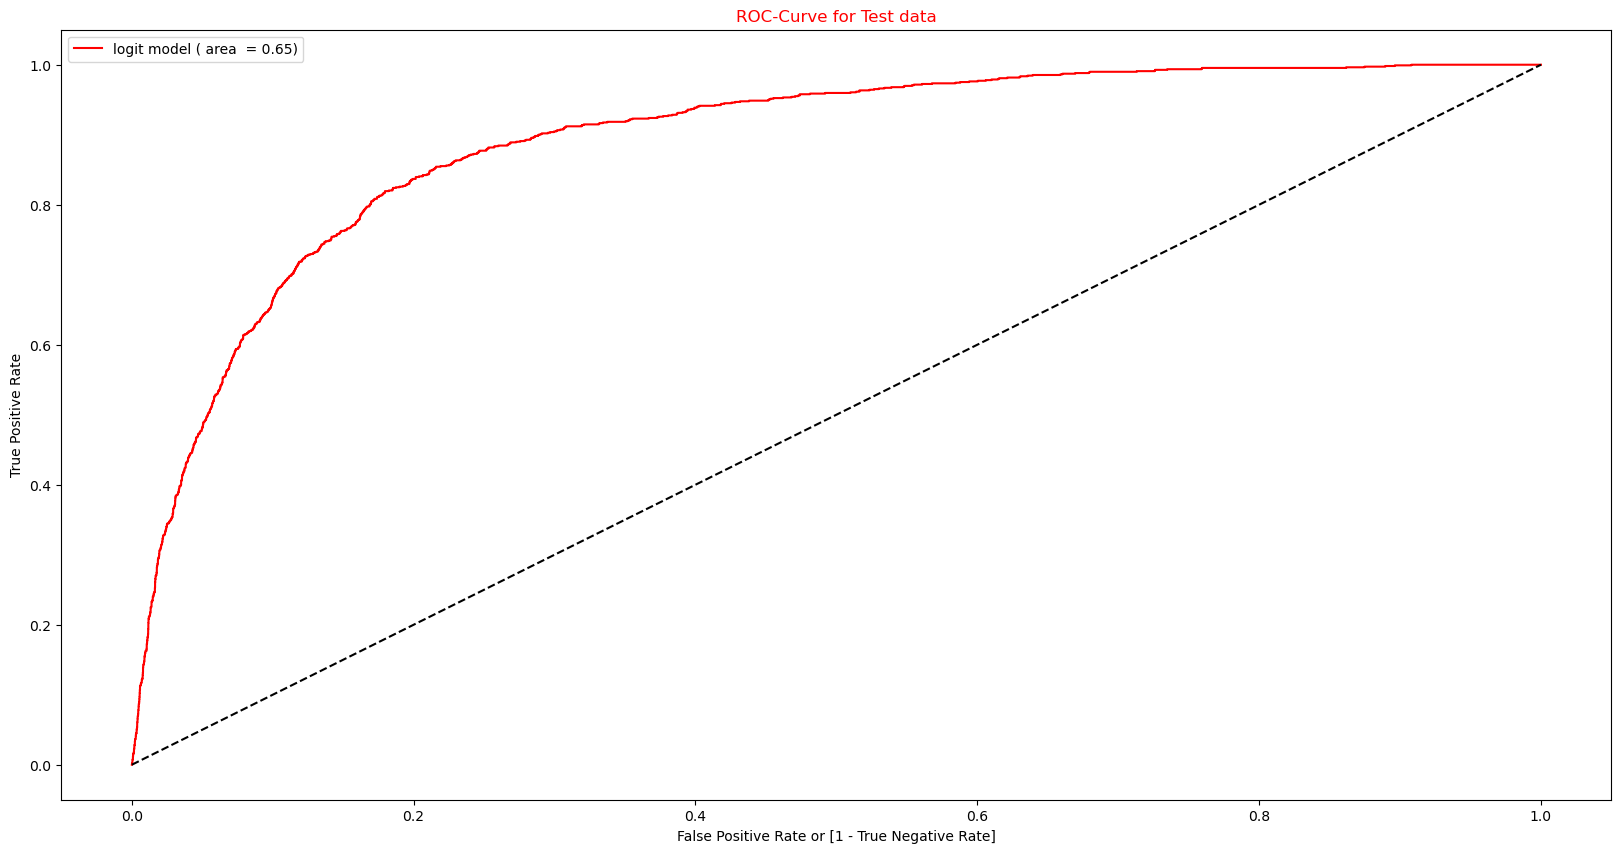

In [60]:
fpr1,tpr1,thresholds1 = roc_curve(y_test, clf.predict_proba(x_test)[:,1])
auc1 = roc_auc_score(y_test,y_pred_test)
plt.figure(figsize=(20,10))
plt.plot(fpr1, tpr1, color='red', label='logit model ( area  = %0.2f)'%auc1)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.title('ROC-Curve for Test data',fontdict={'color':'red'})
plt.show()

In [61]:
model = LogisticRegression()

In [62]:
from sklearn.feature_selection import RFE
rfe = RFE(model,n_features_to_select=20)
rfe.fit(x,y)

RFE(estimator=LogisticRegression(), n_features_to_select=20)

In [63]:
print(rfe.support_)
print(rfe.ranking_)

[False False  True  True False False  True  True  True False False  True
 False  True  True False False  True False False  True False False  True
  True False False  True False  True  True  True  True  True  True  True]
[ 8 14  1  1  3  9  1  1  1 17 15  1  2  1  1 12  6  1  4  7  1 11 13  1
  1 16  5  1 10  1  1  1  1  1  1  1]


In [64]:
list(zip(rfe.ranking_,x.columns,rfe.support_))

[(8, 'balance', False),
 (14, 'age', False),
 (1, 'duration', True),
 (1, 'no_of_times_contacted', True),
 (3, 'pdays', False),
 (9, 'previous', False),
 (1, 'def_credit', True),
 (1, 'housing', True),
 (1, 'loan', True),
 (17, 'day', False),
 (15, 'month', False),
 (1, 'job_admin.', True),
 (2, 'job_blue-collar', False),
 (1, 'job_entrepreneur', True),
 (1, 'job_housemaid', True),
 (12, 'job_management', False),
 (6, 'job_other', False),
 (1, 'job_retired', True),
 (4, 'job_self-employed', False),
 (7, 'job_services', False),
 (1, 'job_student', True),
 (11, 'job_technician', False),
 (13, 'job_unemployed', False),
 (1, 'marital_divorced', True),
 (1, 'marital_married', True),
 (16, 'marital_single', False),
 (5, 'education_other', False),
 (1, 'education_primary', True),
 (10, 'education_secondary', False),
 (1, 'education_tertiary', True),
 (1, 'contact_type_cellular', True),
 (1, 'contact_type_other', True),
 (1, 'contact_type_telephone', True),
 (1, 'poutcome_failure', True),
 (1,

In [65]:
x.columns[rfe.support_]

Index(['duration', 'no_of_times_contacted', 'def_credit', 'housing', 'loan',
       'job_admin.', 'job_entrepreneur', 'job_housemaid', 'job_retired',
       'job_student', 'marital_divorced', 'marital_married',
       'education_primary', 'education_tertiary', 'contact_type_cellular',
       'contact_type_other', 'contact_type_telephone', 'poutcome_failure',
       'poutcome_other', 'poutcome_success'],
      dtype='object')

In [66]:
x.columns[~rfe.support_]

Index(['balance', 'age', 'pdays', 'previous', 'day', 'month',
       'job_blue-collar', 'job_management', 'job_other', 'job_self-employed',
       'job_services', 'job_technician', 'job_unemployed', 'marital_single',
       'education_other', 'education_secondary'],
      dtype='object')

In [67]:
final_df = scaled_data.copy()
final_df.drop(['balance', 'age', 'pdays', 'previous', 'day', 'month',
       'job_blue-collar', 'job_management', 'job_other', 'job_self-employed',
       'job_services', 'job_technician', 'job_unemployed', 'marital_single',
       'education_other', 'education_secondary'],axis=1,inplace=True)
final_df.head()

,response_binary,duration,no_of_times_contacted,def_credit,housing,loan,job_admin.,job_entrepreneur,job_housemaid,job_retired,...,marital_divorced,marital_married,education_primary,education_tertiary,contact_type_cellular,contact_type_other,contact_type_telephone,poutcome_failure,poutcome_other,poutcome_success
0,0,0.011016,-0.569351,0,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,1,0
1,0,-0.416127,-0.569351,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0,-0.707361,-0.569351,0,1,1,0,1,0,0,...,0,1,0,0,0,1,0,0,1,0
3,0,-0.645231,-0.569351,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
4,0,-0.233620,-0.569351,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0


In [68]:
x1 = final_df.iloc[:,1:]
y1= final_df.iloc[:,0]

x_tr,x_tst,y_tr,y_tst = train_test_split(x1,y1,test_size=0.25,random_state=42)

In [69]:
print('Shape of X_training data',x_tr.shape,'\nShape of X_testing data',x_tst.shape,'\nShape of Y_training data',y_tr.shape,'\nShape of Y_testing data',y_tst.shape)

Shape of X_training data (33908, 20) 
Shape of X_testing data (11303, 20) 
Shape of Y_training data (33908,) 
Shape of Y_testing data (11303,)


In [70]:
model.fit(x_tr,y_tr)

LogisticRegression()

In [71]:
y_pred_train1 = model.predict(x_tr)
print('Classification Report for Test data\n\n')
print(classification_report(y_tr,y_pred_train1))
cm2 = confusion_matrix(y_tr,y_pred_train1)
print('Confusion Matrix for Train data\n',cm2)

Classification Report for Test data


              precision    recall  f1-score   support

           0       0.92      0.98      0.95     29972
           1       0.65      0.32      0.43      3936

    accuracy                           0.90     33908
   macro avg       0.78      0.65      0.69     33908
weighted avg       0.88      0.90      0.89     33908

Confusion Matrix for Train data
 [[29288   684]
 [ 2680  1256]]


In [72]:
model.score(x_tst,y_tst)

0.898876404494382

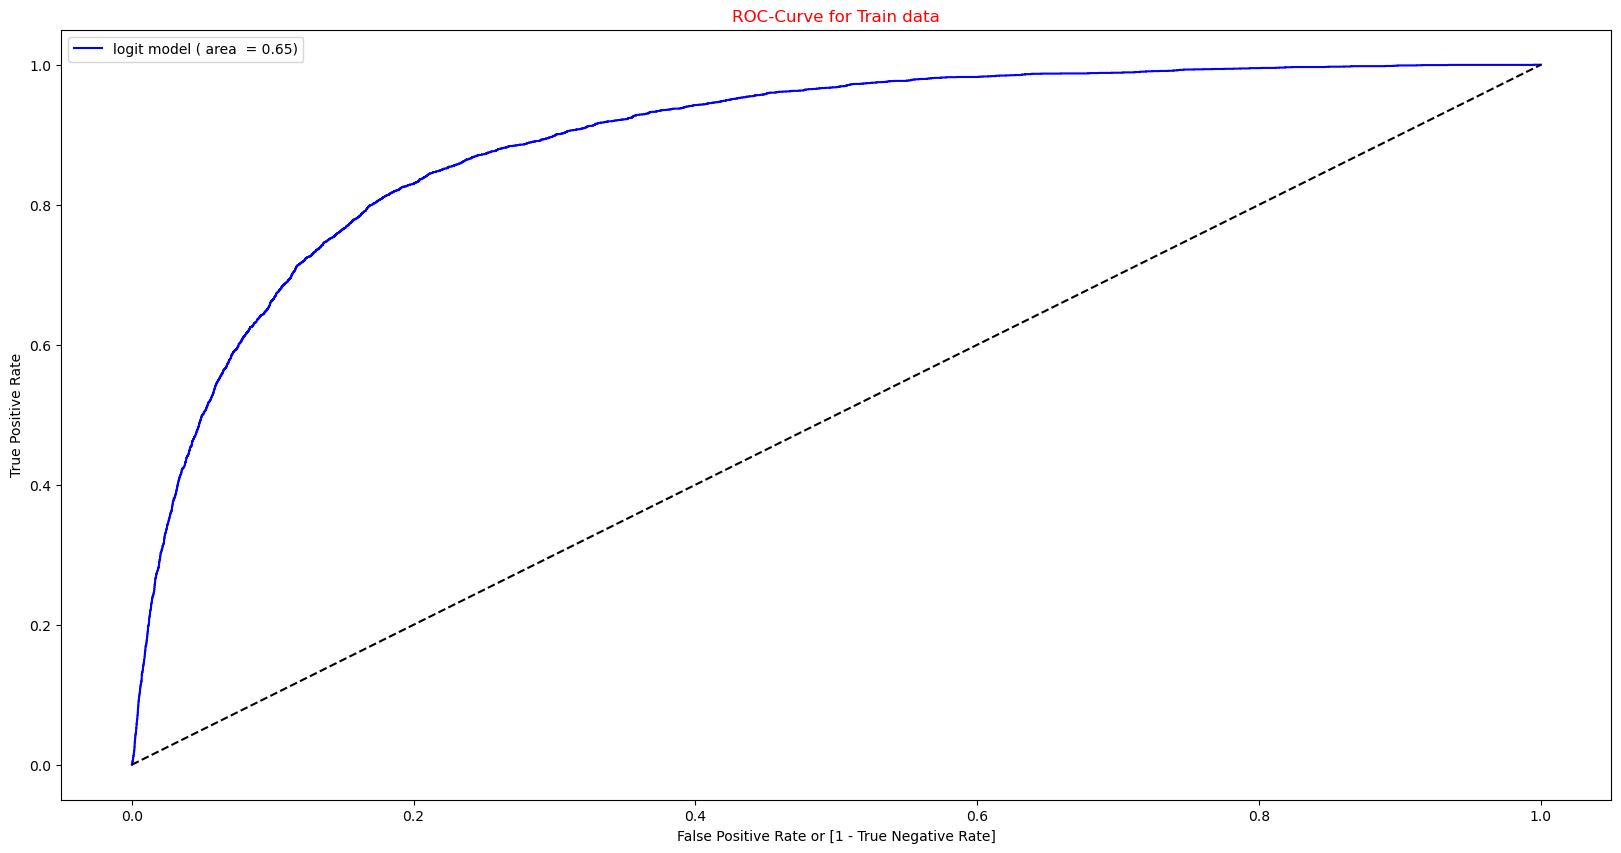

In [73]:
fpr2,tpr2,thresholds2 = roc_curve(y_tr, model.predict_proba(x_tr)[:,1])
auc2 = roc_auc_score(y_tr,y_pred_train1)
plt.figure(figsize=(20,10))
plt.plot(fpr2, tpr2, color='blue', label='logit model ( area  = %0.2f)'%auc2)
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.legend(loc='upper left')
plt.title('ROC-Curve for Train data',fontdict={'color':'red'})
plt.show()

In [74]:
auc2

0.6481421955885114

In [75]:
y_pred_test1 = model.predict(x_tst)

In [76]:
auc3 = roc_auc_score(y_tst,y_pred_test1)

In [77]:
auc3

0.6545561139028475